# Exploratory Data Analysis
Avi Bauer & Matthew Duffy

## Step 0: Import Data
First things first, we need to import our cleaned CSVs as dataframes.

In [ ]:
# Step 0.0: import our libraries

import pandas as pd
import numpy as np
import os

# use the shortcut 'plt' for pyplot
from matplotlib import pyplot as plt

# use 'sns' for seaborn
import seaborn as sns

from collections import Counter

In [ ]:
# Step 0.1: Access Google Drive.

# import requisite library
from google.colab import drive

# login and verity that you want to use it
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 0.2: Move us to the "Data" folder

# identify the root directory
root_dir = "/content/drive/My Drive/"

# identify the location of the cleaned data folder
data_folder = root_dir + "Data - Human Centered DS/Cleaned Data/"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
# Step 0.3: Import our cleaned CSVs

# Set up some dictionaries to store our data
Q1_dic = {'folder':'Question_1'}
Q2_dic = {'folder':'Question_2'}
Q3_dic = {'folder':'Question_3'}
Q4_dic = {'folder':'Question_4'}
all_Q_dic = [Q1_dic, Q2_dic, Q3_dic, Q4_dic]

# iterate through cleaned data subfolders
for Q in all_Q_dic:
  sub_folder = data_folder + Q['folder']
  # print(sub_folder)

  # now iterate through the files in the folder
  for root, direc, files in os.walk(sub_folder):
    for file in files:
      # get our file location
      file_path = os.path.join(root, file)

      # split the file into its name and extension
      filename, extension = os.path.splitext(file)

      # read our file to df and store in the current dic
      Q[filename] = pd.read_csv(file_path)

      # print the key for future reference
      print(Q['folder'],filename)


Question_1 Police_full
Question_1 Police_Stations
Question_1 Random
Question_2 Random
Question_2 Citizen_Admin
Question_3 Citizen
Question_3 Random_Heterogeninty
Question_3 User_Survery
Question_4 Admin
Question_4 CCTVwFemaleStaff
Question_4 Random


## Question 1
**Main Question:**
* What is the relationship between the number of female staff and officers at a given station with the perceptions pertaining to crimes against women held by all staff and officers at that station?

**Subquestions:**
* Is this relationship different if we measure the perceptions of female staff/officers and male staff/officers separately?
* Are these relationships different between the baseline and endline surveys?

### Some more data wrangling

In [ ]:
# first let's locate and isolate the table we want to work with: Police_Stations
pol_stat = Q1_dic['Police_Stations']

# let's first check out what the data looks like
pol_stat.head()

,uid,gender,e_wcase,e_effective,e_false_case,e_helpful,e_add_officer,e_add_female,e_female_better,e_taken_seriously,...,b_total_sampled,b_female_sampled,b_male_sampled,b_total_surveyed,b_female_surveyed,b_male_surveyed,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,2240137,male,too much attention,very effective,common,very helpful,more effective,Less effective,female,disagree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
1,2240133,male,too much attention,very effective,common,very helpful,much more effective,No difference,female,strongly agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
2,2240136,male,too much attention,very effective,uncommon,very helpful,much more effective,Less effective,female,disagree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
3,2240132,female,too much attention,very effective,common,helpful,much more effective,Less effective,female,agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
4,2240134,male,too much attention,very effective,very common,very helpful,much more effective,No difference,female,agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0


In [ ]:
# oh boy 68 is a lot of columns, let's get some overarching info
pol_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     1904 non-null   int64  
 1   gender                  1904 non-null   object 
 2   e_wcase                 1904 non-null   object 
 3   e_effective             1904 non-null   object 
 4   e_false_case            1904 non-null   object 
 5   e_helpful               1904 non-null   object 
 6   e_add_officer           1904 non-null   object 
 7   e_add_female            1904 non-null   object 
 8   e_female_better         1904 non-null   object 
 9   e_taken_seriously       1904 non-null   object 
 10  e_prof_dev              1904 non-null   object 
 11  e_work_help             1904 non-null   object 
 12  e_pol_impt              1904 non-null   float64
 13  e_thana_impt            1904 non-null   float64
 14  e_sensitivity           1904 non-null   

In [ ]:
# Looking above, 2-14 correspond to the endline survey data. These are
# all object/strings (could probably have converted these to categorical).

# Cols cols 28-36 correspond to the baseline data, and are...floats,
# not strings. Weird. Let's take a look.

pol_stat['b_helpful'].value_counts()

,count
b_helpful,
5.000000,719
4.000000,370
4.545454,53
4.454546,50
4.500000,49
4.750000,42
4.363637,41
4.727272,39
4.666666,38


Fascinating. These appear to be some categorical scale (hence the repeated decimal values) converted to floats.

Long story short: I'm not sure if we can use these values as they are. BUT we do have another csv, police_baseline data.csv

We're going to (1) import, (2) clean, and (3) merge that csv. I'm going to do this in a seperate notebook for the sake of keeping this one clean (see: `Bauer_Duffy_DataCleaning_Supp.ipynb`, *Appendix 1*).

In [ ]:
# let's grab that cleaned file:
file_path = "Question_1/Police_full.csv"
pol_full = pd.read_csv(file_path)

# and let's see what it looks like
pol_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     1009 non-null   int64  
 1   gender                  1009 non-null   object 
 2   e_wcase                 1009 non-null   object 
 3   e_effective             1009 non-null   object 
 4   e_false_case            1009 non-null   object 
 5   e_helpful               1009 non-null   object 
 6   e_add_officer           1009 non-null   object 
 7   e_add_female            1009 non-null   object 
 8   e_female_better         1009 non-null   object 
 9   e_taken_seriously       1009 non-null   object 
 10  e_prof_dev              1009 non-null   object 
 11  e_work_help             1009 non-null   object 
 12  e_pol_impt              1009 non-null   float64
 13  e_thana_impt            1009 non-null   float64
 14  e_sensitivity           1009 non-null   

In [ ]:
# This is a very wide dataset, so we'll look at it piecewise at first
# To start, let's look at just the baseline and endline survey results

# define subsets for examination
b_cols = ['b_pol_impt_base','b_thana_impt_base','b_wcase_base','b_effective_base','b_helpful_base','b_add_officer_base','b_add_female_base','b_female_better_base','b_sensitivity_base']
e_cols = ['e_wcase','e_effective','e_false_case','e_helpful','e_add_officer','e_add_female','e_female_better','e_taken_seriously','e_prof_dev','e_work_help','e_pol_impt','e_thana_impt','e_sensitivity']
be_cols = b_cols + e_cols

b_survey = pol_full[b_cols]
e_survey = pol_full[e_cols]
all_survey = pol_full[be_cols]

# generate some basic summary stats
b_summary = b_survey.describe(include = 'all')
e_summary = e_survey.describe(include = 'all')
all_summary = all_survey.describe(include='all')

# take a look!
display(b_summary)
display(e_summary)

,b_pol_impt_base,b_thana_impt_base,b_wcase_base,b_effective_base,b_helpful_base,b_add_officer_base,b_add_female_base,b_female_better_base,b_sensitivity_base
count,1009.000000,1009.000000,1009,1009,1009,1009,1009,1009,1009.000000
unique,NaN,NaN,3,5,5,5,5,3,NaN
top,NaN,NaN,too much attention,very effective,very helpful,much more effective,much less effective,female,NaN
freq,NaN,NaN,715,661,647,498,635,815,NaN
mean,0.385530,0.393459,NaN,NaN,NaN,NaN,NaN,NaN,7.136769
std,0.486962,0.488759,NaN,NaN,NaN,NaN,NaN,NaN,2.457400
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
75%,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000


,e_wcase,e_effective,e_false_case,e_helpful,e_add_officer,e_add_female,e_female_better,e_taken_seriously,e_prof_dev,e_work_help,e_pol_impt,e_thana_impt,e_sensitivity
count,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009.000000,1009.000000,1009.000000
unique,3,4,4,4,3,3,3,4,4,4,NaN,NaN,NaN
top,too much attention,very effective,uncommon,very helpful,much more effective,Less effective,female,agree,agree,agree,NaN,NaN,NaN
freq,749,594,354,668,654,644,781,705,700,431,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385530,0.437066,7.533201
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486962,0.496270,2.497049
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,9.000000


Looking at our summary stats above, four columns (two baseline and their corresponding endline columns) are clearly boolean, not numeric (i.e. either 0 or 1).
* `b_pol_impt_base`, `e_pol_impt`
* `b_thana_impt_base`, `e_thana_impt`

We then have two columns (one each baseline and endline) being treated numerically.
* `b_sensitivity_base`, `e_sensitivity`

Our percentiles for `*_sensitivity` variables are integers, which begs the question: is this genuinely a numeric, continuous variable, or better understood as a ordinal variable?


In [ ]:
# Look at b_sensitivity_base's values:
pol_full['b_sensitivity_base'].value_counts()

,count
b_sensitivity_base,
7.0,174
6.0,172
8.0,151
5.0,120
9.0,99
4.0,92
10.0,69
11.0,38
3.0,30


Yes, this is pretty clearly an ordinal scale. In fact, looking at the `ReadMe.pdf` and `Police survey.pdf` files, my best guess is that this is an indexed score summarizing several questions that concern cases/crimes against women.

In [ ]:
# let's revise some of these data types to match what we're really seeing.

# first let's change these strings (and our funky int column) to categorical values
pol_full[be_cols] = pol_full[be_cols].astype('category')

# then correct our boolean values
pol_full['b_pol_impt_base']   = pol_full['b_pol_impt_base'].astype('bool')
pol_full['e_pol_impt']        = pol_full['e_pol_impt'].astype('bool')
pol_full['b_thana_impt_base'] = pol_full['b_thana_impt_base'].astype('bool')
pol_full['e_thana_impt']      = pol_full['e_thana_impt'].astype('bool')

# and take a peak!
pol_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   uid                     1009 non-null   int64   
 1   gender                  1009 non-null   object  
 2   e_wcase                 1009 non-null   category
 3   e_effective             1009 non-null   category
 4   e_false_case            1009 non-null   category
 5   e_helpful               1009 non-null   category
 6   e_add_officer           1009 non-null   category
 7   e_add_female            1009 non-null   category
 8   e_female_better         1009 non-null   category
 9   e_taken_seriously       1009 non-null   category
 10  e_prof_dev              1009 non-null   category
 11  e_work_help             1009 non-null   category
 12  e_pol_impt              1009 non-null   bool    
 13  e_thana_impt            1009 non-null   bool    
 14  e_sensitivity           

### **Deep Dive:** What's going on with `add_officers` and `add_female`?

In [ ]:
# let's revisit our summary stats

# we need to quickly refresh our subsets with the new typing
b_survey = pol_full[b_cols]
e_survey = pol_full[e_cols]
all_survey = pol_full[be_cols]

# generate some basic summary stats
b_summary = b_survey.describe(include = 'all')
e_summary = e_survey.describe(include = 'all')
all_summary = all_survey.describe(include='all')

# take a look!
display(b_summary)
display(e_summary)

,b_pol_impt_base,b_thana_impt_base,b_wcase_base,b_effective_base,b_helpful_base,b_add_officer_base,b_add_female_base,b_female_better_base,b_sensitivity_base
count,1009,1009,1009,1009,1009,1009,1009,1009,1009.0
unique,2,2,3,5,5,5,5,3,16.0
top,False,False,too much attention,very effective,very helpful,much more effective,much less effective,female,7.0
freq,620,612,715,661,647,498,635,815,174.0


,e_wcase,e_effective,e_false_case,e_helpful,e_add_officer,e_add_female,e_female_better,e_taken_seriously,e_prof_dev,e_work_help,e_pol_impt,e_thana_impt,e_sensitivity
count,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009.0
unique,3,4,4,4,3,3,3,4,4,4,2,2,16.0
top,too much attention,very effective,uncommon,very helpful,much more effective,Less effective,female,agree,agree,agree,False,False,7.0
freq,749,594,354,668,654,644,781,705,700,431,620,568,198.0


Okay, something else is interesting here: corresponding questions in the endline and baseline series have different numbers of unique responses. For example: `add_female`. The corresponding question is:

> Do you think hiring additional female officers will make the police more or less effective in dealing with cases related to women?

in b_add_female_base, we have 5 unique answers. in e_add_female, we have 3. Let's investigate.


In [ ]:
# first, what are the unique answers for each question?
display(pol_full['b_add_female_base'].value_counts())
display(pol_full['e_add_female'].value_counts())

,count
b_add_female_base,
much less effective,635
less effective,313
no difference,51
more effective,7
much more effective,3


,count
e_add_female,
Less effective,644
No difference,354
More Effective,11


It seems in the endline survey, either "much more effective" and "much less effective" weren't offered as possible answers, or for some reason none of the respondents chose either option.

To verify what options were available, let's compare the baseline and endline police survey questions and answers.

Baseline survey question:
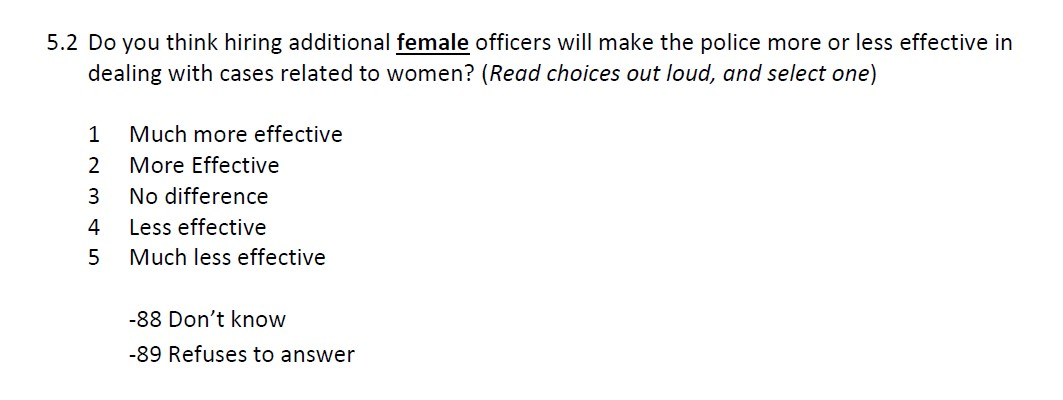

Endline Question:
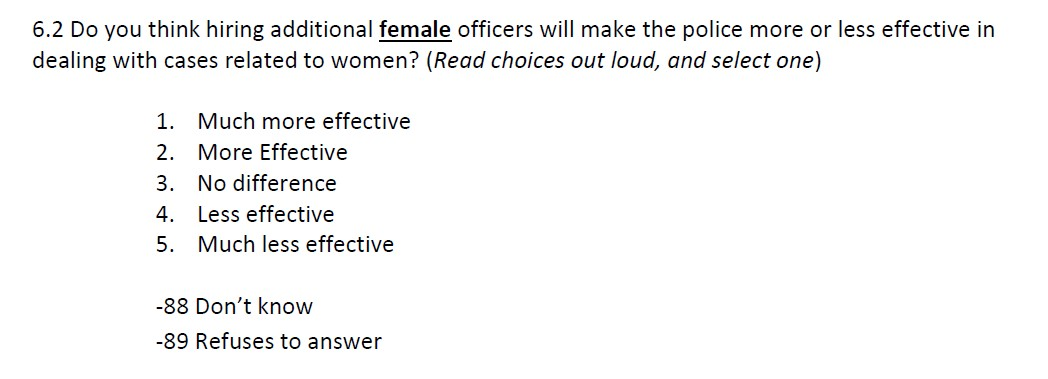

So the questions are the same. What caused the change? One possible theory is that participating in the program made officers feel like they shouldn't be so harsh on women officers, and/or those in the treatment arms may have actually seen and learned from women officers.

Another theory is that this is some kind of coding error, which would be unfortunate. Or, perhaps, there is some variable connecting officers with extreme opinions and their "staying power" through to the endline measurement?

For now, I'm going to step away from comparing the baseline and endline answers directly, as there seems to be some unexplained major shift in responses that I can't account for yet.

So for today, let's focus on baseline survey responses to do some univariate visualations. We can even start with this puzzling question, represented by `b_add_female_base`.

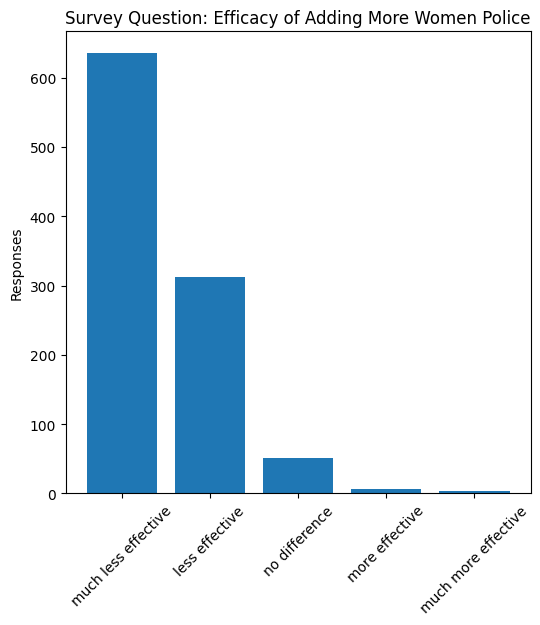

In [ ]:
# we'll start by making a barchart
# adapted from course material: EDA_baseball.ipynb

# we'll need our frequencies and category names
af_y = list(b_survey['b_add_female_base'].value_counts())
af_cats = list(b_survey['b_add_female_base'].value_counts().keys())

# let's make ourselves a figure
fig, ax = plt.subplots(figsize=(6,6))

# set our x and y
x_values = list(range(1, len(af_y) + 1))
y_values = af_y

# add our data to our figure!
_ = ax.bar(
    x = x_values,
    height = y_values,
    tick_label = af_cats
)

# add some labels and clean it up a bit
_ = plt.title("Survey Question: Efficacy of Adding More Women Police")
_ = plt.ylabel("Responses")
_ = plt.xticks(rotation = 45)

From a feminist perspective, this is dissapointing to see: overwhelmingly, respondents seem to say that adding more women officers will reduce the efficacy of the police in dealing with cases related to women.

This seems a little counter-intuitive, when we place it next to `add_officer` and `female_better`. The first asks:

> "Do you think hiring additional officers will make the police more or less effective in dealing with cases related to women?

The second asks:

> "Who do you think is more effective in dealing with cases related to women?" [options: male officers, female officers]

We can visualize the first pair in a normalized horizontal bar chart (see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.htmll)

In [ ]:
# first, though, yet another oddball: the category order for add_officer is REVERSED from that
# for add_female. So we'll need to flip that list. I know it looks kind of fishy,
# so let's demonstrate:
display(b_survey['b_add_officer_base'].value_counts()) # add officers
display(b_survey['b_add_female_base'].value_counts()) # add women officers

# as you can see, the values are reversed. Not sure why that happened. Does value_counts()
# order output from greatest to least?

,count
b_add_officer_base,
much more effective,498
more effective,457
no difference,45
less effective,7
much less effective,2


,count
b_add_female_base,
much less effective,635
less effective,313
no difference,51
more effective,7
much more effective,3


<ipython-input-16-91c146b2db32>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Add Officers': list(reversed(b_survey['b_add_officer_base'].value_counts())),


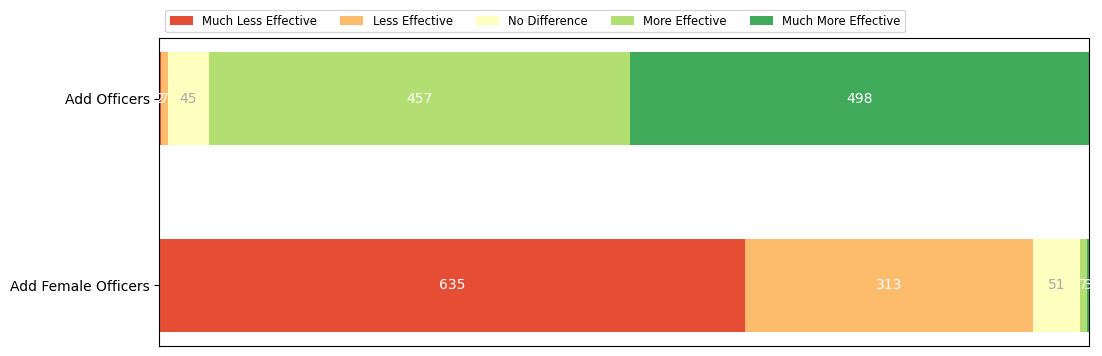

In [ ]:
# putting that aside, let's make our plot
# credit to https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html

# possible responses
category_names = ['Much Less Effective','Less Effective','No Difference','More Effective','Much More Effective']

results = {
    'Add Officers': list(reversed(b_survey['b_add_officer_base'].value_counts())),
    'Add Female Officers': list(b_survey['b_add_female_base'].value_counts())
}

# define the function to arrange our data prettily
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

That's a wild degree of difference, to a point that seems suspicious. The distributions are nearly mirror reflections. Looking at the unedited CSV, though, there are no clear signs of tampering or other obvious reasons, other than a genuine difference in the responses from the officers.

There is still a chance there's some coding funkery going on here. Let's revisit those numerical values for the baseline responses that come from `Police_Stations.csv`.

In [ ]:
# The columns we want are now b_add_officer and b_add_female.
# let's do a quick statistical summary of each.

display(pol_full['b_add_officer'].describe())
display(pol_full['b_add_female'].describe())

,b_add_officer
count,1009.000000
mean,4.429138
std,0.632442
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


,b_add_female
count,1009.000000
mean,4.555996
std,0.652442
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# it looks like we have these values encoded
# in a 5-point scale. Let's visually confirm:
display(pol_full['b_add_officer'].head(10))
display(pol_full['b_add_female'].head(10))

,b_add_officer
0,4.0
1,5.0
2,4.0
3,4.0
4,5.0
5,4.0
6,5.0
7,4.0
8,5.0
9,4.0


,b_add_female
0,5.0
1,5.0
2,5.0
3,5.0
4,4.0
5,5.0
6,4.0
7,5.0
8,5.0
9,5.0


Okay, things got weirder. We've more or less confirmed that, at least for the subset of data points we are working with (which, reminder, are individuals who we could match `uid` from baseline to endline), these two questions operate as ordinal variables, on a 5-point scale.

But here's where it gets interesting: Look at those means:
* `b_add_officer`: 4.43
* `b_add_female`: 4.56

Those are *extremely* close values, especially as both have a standard deviation around 0.65. There is no indication that either of these values are reverse-coded, so in theory, as the questions present identical sets of 5 answer choices, these indices should reflect which of them they selected on the same 1-5 scale. So you would assume a 5 on one = a 5 on the other.

I'm going to posit something a little out there: **I think b_add_female_base got flipped during the encoding.**

Thinking about this from an intuitive perspective (dangerous, I know), what reason would police officers think have to think that (1) hiring more officers in general is helpful, but (2) hiring specifically female officers is a hindrance?

Another piece of evidence: let's look at the summary stats for `b_female_better_base` and `b_female_better`. These both answer the question:

> Who do you think is more effective in dealing with cases related to women? [options: male, female, no difference]

In [ ]:
# summarize and display for each variable:
display(pol_full['b_female_better_base'].describe())
display(pol_full['b_female_better'].describe())

,b_female_better_base
count,1009
unique,3
top,female
freq,815


,b_female_better
count,1009.000000
mean,2.740337
std,0.572145
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


In [ ]:
# let's also look at the spreads here:
display(pol_full['b_female_better_base'].value_counts())
display(pol_full['b_female_better'].value_counts())

,count
b_female_better_base,
female,815
no difference,126
male,68


,count
b_female_better,
3.0,815
2.0,126
1.0,68


One relief: The data matches between the encoded text answers vs. the ordinal 1-3 scale. So that's not acting up.

But more to the point: around 80% of respondents think women officers are better at dealing with cases related to women. This casts our results from `b_add_female_base` into even harsher doubt. If women officers are better at women's cases, why would adding women officers decrease their ability to deal with women's cases?

**(tentative) CONCLUSION: We should trust `b_add_female` over `b_add_female_base`, and assume a majority positive rather than majority negative response.**

<ipython-input-21-45a31e240531>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Add Officers': list(reversed(b_survey['b_add_officer_base'].value_counts())),
<ipython-input-21-45a31e240531>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Add Female Officers': list(reversed(b_survey['b_add_female_base'].value_counts()))


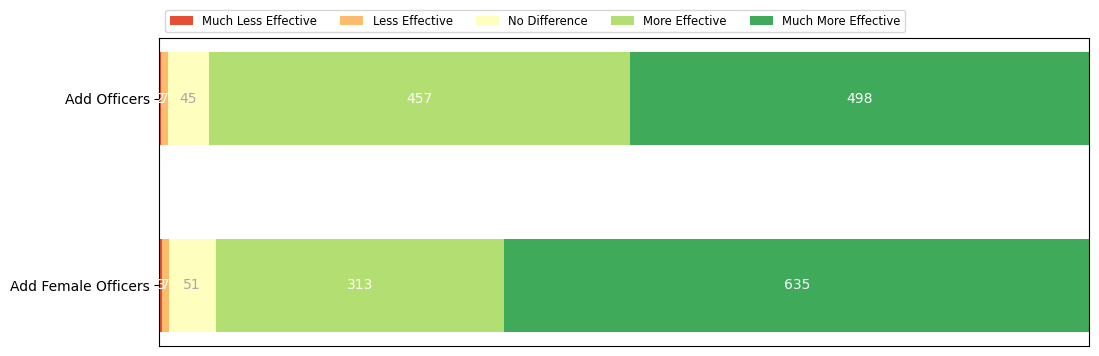

In [ ]:
# for fun, we can revisit our horizontal bar chart.

# possible responses
category_names = ['Much Less Effective','Less Effective','No Difference','More Effective','Much More Effective']

# this time, we flip them both, to keep the color pallette intuitive
results = {
    'Add Officers': list(reversed(b_survey['b_add_officer_base'].value_counts())),
    'Add Female Officers': list(reversed(b_survey['b_add_female_base'].value_counts()))
}

survey(results,category_names)
plt.show()

Now this is a much more intuitive, and interesting (but not in a stressful way) plot. It seems the percentage who think adding any officers and adding female officers will improve their abilities is about equal, but there is greater confidence in adding female officers. Interesting!

Next steps in analysis here would be to look at the distribution of women officers across stations, and the relationships between survey responses and the number or percentage of women officers at each station.

## Question 2
**Main Question:**
* Does the creation of a WHD or a women-run WHD cause an increase in dial100 calls to the station?

**Subquestions:**
* Does the number of calls to the station correlate with community or user satisfaction measures?
* Does this have an effect on the number of reports filed (FIR and DIR)?


### **Groups:** Baseline vs. endline number of dials, by station

In [ ]:
# isolate our df of interest
dial100 = Q2_dic['Citizen_Admin']

# let's take a look at some basic info
dial100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36234 entries, 0 to 36233
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     36234 non-null  int64  
 1   b_visit                 36234 non-null  float64
 2   b_pol_handling          36234 non-null  float64
 3   b_safety                36234 non-null  float64
 4   e_urja_knowledge        36234 non-null  object 
 5   e_visit                 36234 non-null  float64
 6   e_pol_handling          36234 non-null  float64
 7   e_safety                36234 non-null  float64
 8   spw                     36234 non-null  float64
 9   e_gender                36234 non-null  object 
 10  hh_id                   36234 non-null  float64
 11  member_gender           36234 non-null  object 
 12  ps_code                 36234 non-null  float64
 13  population              36234 non-null  int64  
 14  urban                   36234 non-null

There's a lot of data to work with here. But just to get started, let's focus on station, treatment group, and dial100 counts.

In [ ]:
# we can grab just the station, treatment, month, and dial100 columns
dial100_small = dial100[['ps_code','group','month','b_dial100_count','e_dial100_count','population']]

# even better, we can dedupe this data
dial100_small = dial100_small.drop_duplicates()

# what's left?
dial100_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 0 to 35859
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ps_code          1980 non-null   float64
 1   group            1980 non-null   object 
 2   month            1980 non-null   float64
 3   b_dial100_count  1980 non-null   float64
 4   e_dial100_count  1980 non-null   float64
 5   population       1980 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 108.3+ KB


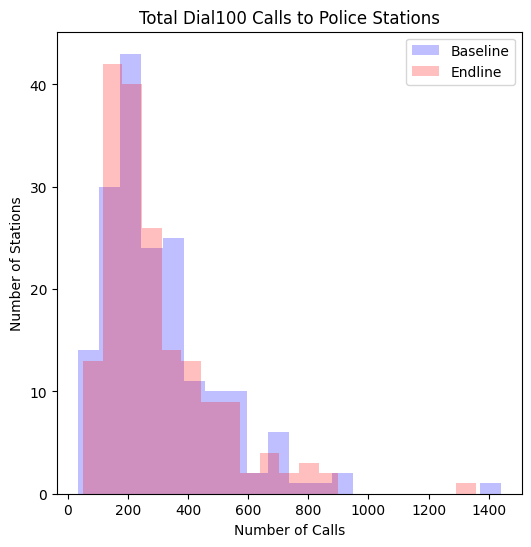

In [ ]:
# we can do some grouping here: let's do it by station first
dial100_stat = dial100_small.groupby(['ps_code'])

# take the total baseline and endline dial counts by station
b_dial_sums = dial100_stat['b_dial100_count'].sum()
e_dial_sums = dial100_stat['e_dial100_count'].sum()

# let's plot an overlaid histogram to see what our spread looks like
# and see if there are obvious trends
# again, pulling from EDA_baseball.ipynb

# make a figure
hist_fig = plt.figure(figsize=(6,6))

# plot some data
_ = plt.hist(b_dial_sums, color = 'blue', alpha=0.25, bins=20, label = "Baseline")
_ = plt.hist(e_dial_sums, color = 'red', alpha=0.25, bins=20, label = "Endline")

# add some labels
_ = plt.title("Total Dial100 Calls to Police Stations")
_ = plt.ylabel("Number of Stations")
_ = plt.xlabel("Number of Calls")
_ = plt.legend()

Okay, so no clear differences here between baseline and endline, although we've found one very interesting outlier. Most likely that is the same station baseline and endline, but it's worth checking. We can do that via scatterplot.

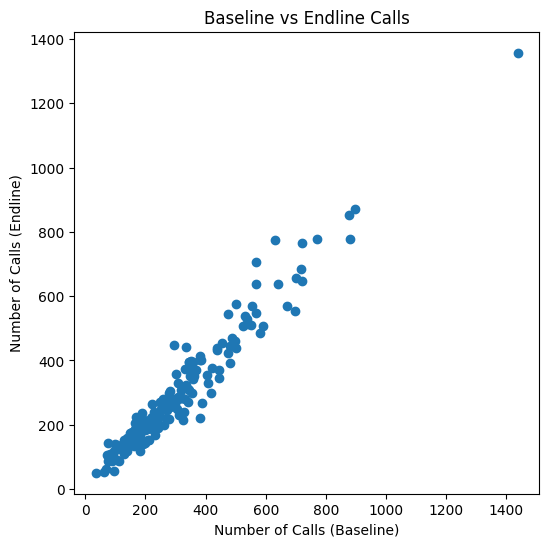

In [ ]:
# make a fig
scatter_fig = plt.figure(figsize=(6,6))

# add some data
_ = plt.scatter(b_dial_sums, e_dial_sums)

# set labels
_ = plt.title("Baseline vs Endline Calls")
_ = plt.ylabel("Number of Calls (Endline)")
_ = plt.xlabel("Number of Calls (Baseline)")

Yep, that is one way out there outlier. Is it still an outlier if we look at monthly means rather than totals?

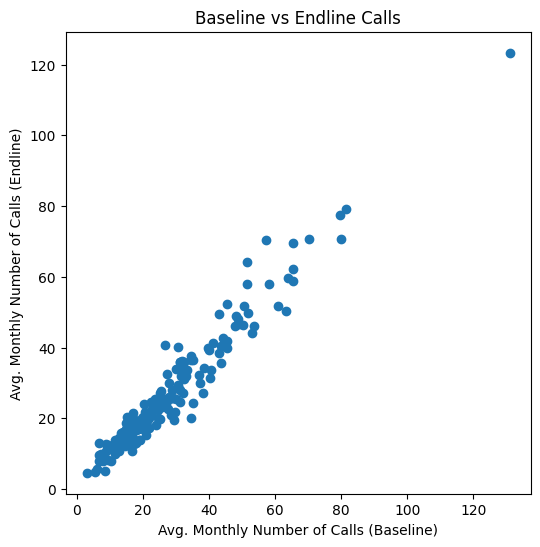

In [ ]:
# take the average baseline and endline dial counts by station
b_dial_means = dial100_stat['b_dial100_count'].mean()
e_dial_means = dial100_stat['e_dial100_count'].mean()

# make a new fig
scatter_fig = plt.figure(figsize=(6,6))

# add some data
_ = plt.scatter(b_dial_means, e_dial_means)

# set labels
_ = plt.title("Baseline vs Endline Calls")
_ = plt.ylabel("Avg. Monthly Number of Calls (Endline)")
_ = plt.xlabel("Avg. Monthly Number of Calls (Baseline)")

If we remove this outlier from our dataset, what does the remainder look like?

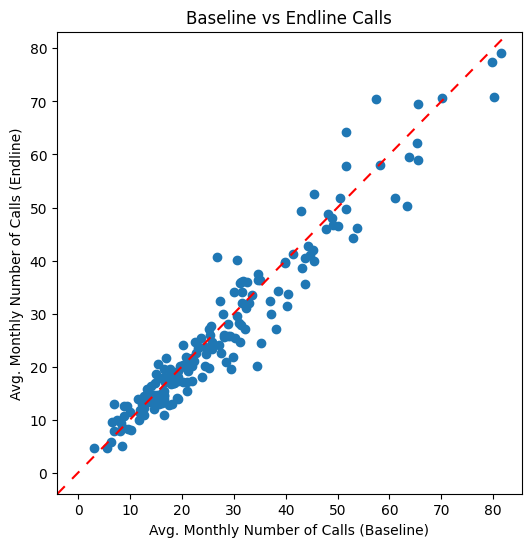

In [ ]:
# drop values of a certain size from the set of means
e_means = e_dial_means[e_dial_means < 120 ]
b_means = b_dial_means[b_dial_means < 120 ]

# plot again!
scatter_fig = plt.figure(figsize=(6,6))
_ = plt.scatter(b_means, e_means)
_ = plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

# set labels
_ = plt.title("Baseline vs Endline Calls")
_ = plt.ylabel("Avg. Monthly Number of Calls (Endline)")
_ = plt.xlabel("Avg. Monthly Number of Calls (Baseline)")

Seems like we have an awfully linear relationship here. One more layer we can add: colour our points by treatment group.

In [ ]:
# separate our big list into three sublists

# identify our groups
arms = list(dial100_small['group'].value_counts().keys())

# iterate through groups to create 3 sub-dataframes
dial100_dic = {}
for arm in arms:
  dial100_dic[arm] = dial100_small[dial100_small['group'] == arm]

# now groupby stations again, and grab the means while we're here
dial100_stat_dic = {}
b_mean_dic = {}
e_mean_dic = {}
for key, value in dial100_dic.items():
  dial100_stat_dic[key] = value.groupby('ps_code')
  b_mean_dic[key] = dial100_stat_dic[key]['b_dial100_count'].mean()
  e_mean_dic[key] = dial100_stat_dic[key]['e_dial100_count'].mean()

# don't forget to remove our outlier to get a better look
for arm in arms:
  b_mean_dic[arm] = b_mean_dic[arm][b_mean_dic[arm] < 120]
  e_mean_dic[arm] = e_mean_dic[arm][e_mean_dic[arm] < 120]

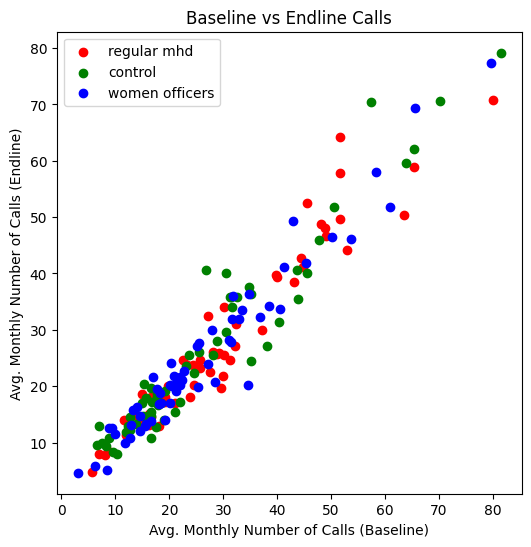

In [ ]:
# plot plot plot
scatter_fig = plt.figure(figsize=(6,6))

# define our colors
c = ['red','green','blue']

for i,arm in enumerate(arms):
  _ = plt.scatter(b_mean_dic[arm], e_mean_dic[arm],c=c[i],label=arm)

# set labels
_ = plt.title("Baseline vs Endline Calls")
_ = plt.ylabel("Avg. Monthly Number of Calls (Endline)")
_ = plt.xlabel("Avg. Monthly Number of Calls (Baseline)")
_ = plt.legend()


From just a visual overview, there doesn't appear to be a clear grelationship between number of calls (or change from baseline to endline in number of calls) and treatment groups. However, these graphs do not control for the many other station characteristics in this data set, such as urban/rural or size of the precinct. Controlling for these might show a different relationship.

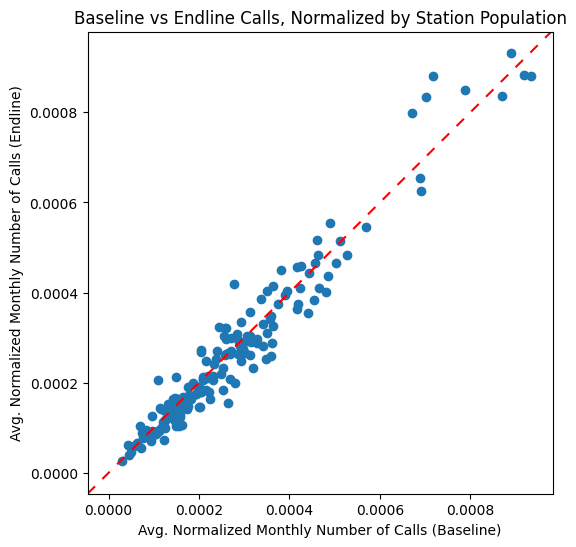

In [ ]:
# let's see what happens when we do control by population
b_dial_pop = dial100_stat['b_dial100_count'].mean() / dial100_stat['population'].median()
e_dial_pop = dial100_stat['e_dial100_count'].mean() / dial100_stat['population'].median()

# plot again!
scatter_fig = plt.figure(figsize=(6,6))
_ = plt.scatter(b_dial_pop, e_dial_pop)
_ = plt.axline((0, 0), slope=1, color="red", linestyle=(0, (5, 5)))

# set labels
_ = plt.title("Baseline vs Endline Calls, Normalized by Station Population")
_ = plt.ylabel("Avg. Normalized Monthly Number of Calls (Endline)")
_ = plt.xlabel("Avg. Normalized Monthly Number of Calls (Baseline)")

## Question 3
**Main Question:**
* How do community perceptions and opinions of police change when different treatments (treatment and WHD variations) are implemented?

**Subquestions:**
* How does the quality of treatment affect it?
Does treatment help user satisfaction and how does that compare to effects on the community?



In [ ]:
for key, value in Q3_dic.items():
  print(key)
  try:
    display(value.head())
    value.info()
  except:
    display(value)

folder


'Question_3'

Citizen


,uid,b_visit,b_pol_handling,b_safety,e_urja_knowledge,e_visit,e_pol_handling,e_safety,spw,e_gender,...,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,attrited
0,10512011,0.0,0.444444,3.666667,No,0.0,0.500000,4.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
1,10512031,0.0,-0.111111,2.333333,No,0.0,0.250000,2.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
2,10512041,0.0,-0.200000,3.666667,No,0.0,0.535941,3.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
3,10512141,0.0,0.000000,3.666667,No,0.0,1.000000,3.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
4,10512171,1.0,0.000000,3.333333,No,0.0,0.333333,2.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3294 non-null   int64  
 1   b_visit                 3294 non-null   float64
 2   b_pol_handling          3294 non-null   float64
 3   b_safety                3294 non-null   float64
 4   e_urja_knowledge        3294 non-null   object 
 5   e_visit                 3294 non-null   float64
 6   e_pol_handling          3294 non-null   float64
 7   e_safety                3294 non-null   float64
 8   spw                     3294 non-null   float64
 9   e_gender                3294 non-null   object 
 10  hh_id                   3294 non-null   float64
 11  member_gender           3294 non-null   object 
 12  ps_code                 3294 non-null   float64
 13  population              3294 non-null   int64  
 14  urban                   3294 non-null   

,rand_index,total_assigned_officers,total_fir_2017,population,urban,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,0,47,412,129345,Rural,1,-0.234041,Treatment,women officers,1000,9.000000,2.916667,2.200000,0,1
1,1,29,218,170000,Rural,1,-0.960574,Control,control,1000,7.462185,1.545454,1.798067,0,0
2,2,75,694,102467,Rural,1,1.042663,Control,control,1000,7.462185,1.090909,1.798067,0,0
3,3,40,144,54000,Rural,1,-1.590761,Treatment,regular mhd,1000,7.000000,3.897297,2.030000,1,0
4,4,37,130,76376,Rural,1,-1.570695,Treatment,women officers,1000,9.000000,4.157658,2.200000,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rand_index               180 non-null    int64  
 1   total_assigned_officers  180 non-null    int64  
 2   total_fir_2017           180 non-null    int64  
 3   population               180 non-null    int64  
 4   urban                    180 non-null    object 
 5   dist_urban               180 non-null    int64  
 6   strat_pca                180 non-null    float64
 7   treatment                180 non-null    object 
 8   group                    180 non-null    object 
 9   dist_id                  180 non-null    int64  
 10  implement_quality        180 non-null    float64
 11  training_score           180 non-null    float64
 12  comm_outreach_strength   180 non-null    float64
 13  regular_whd              180 non-null    int64  
 14  women_whd                1

,uid,consented,gender,visitsats,comfort,respect,resolution,fclitysats,ps_code,population,...,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,2153QSR,yes,female,Very satisfied,Very comfortable,Very respectfully,Very confident,Very satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
1,20519SG,yes,female,Somewhat satisfied,Somewhat uncomfortable,Very respectfully,Very confident,Very satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
2,2051HG7,yes,male,Somewhat satisfied,Very comfortable,Somewhat respectfully,Very confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
3,2051QJF,yes,female,Somewhat satisfied,Somewhat comfortable,Somewhat respectfully,Very confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
4,2051KRN,yes,male,Very satisfied,Somewhat comfortable,Somewhat respectfully,Somewhat confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3178 non-null   object 
 1   consented               3178 non-null   object 
 2   gender                  3178 non-null   object 
 3   visitsats               3178 non-null   object 
 4   comfort                 3178 non-null   object 
 5   respect                 3178 non-null   object 
 6   resolution              3178 non-null   object 
 7   fclitysats              3178 non-null   object 
 8   ps_code                 3178 non-null   float64
 9   population              3178 non-null   int64  
 10  urban                   3178 non-null   object 
 11  dist_urban              3178 non-null   int64  
 12  strat_pca               3178 non-null   float64
 13  treatment               3178 non-null   object 
 14  group                   3178 non-null   

### Citizen

#### Summary Stats

In [ ]:
#Let's find some summary stats for Citizen
citizen = Q3_dic['Citizen']
numeric = ['b_pol_handling', 'e_pol_handling', 'b_safety', 'e_safety',
           'implement_quality', 'training_score', 'comm_outreach_strength']
numericCitizen = citizen[numeric]
numericCitizen.describe()

,b_pol_handling,e_pol_handling,b_safety,e_safety,implement_quality,training_score,comm_outreach_strength
count,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,0.357155,0.535941,3.350867,3.194242,7.416473,2.046600,1.805109
std,0.465432,0.449314,0.467032,0.491611,1.068879,1.231852,0.607820
min,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.250000,3.000000,3.000000,7.000000,1.181818,1.805109
50%,0.375000,0.600000,3.333333,3.333333,7.416473,2.166667,1.805109
75%,0.750000,1.000000,3.666667,3.500000,8.000000,3.199226,2.150000
max,1.000000,1.000000,4.000000,4.000000,9.000000,4.583334,3.330000


In [ ]:
citizen.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3294 non-null   int64  
 1   b_visit                 3294 non-null   float64
 2   b_pol_handling          3294 non-null   float64
 3   b_safety                3294 non-null   float64
 4   e_urja_knowledge        3294 non-null   object 
 5   e_visit                 3294 non-null   float64
 6   e_pol_handling          3294 non-null   float64
 7   e_safety                3294 non-null   float64
 8   spw                     3294 non-null   float64
 9   e_gender                3294 non-null   object 
 10  hh_id                   3294 non-null   float64
 11  member_gender           3294 non-null   object 
 12  ps_code                 3294 non-null   float64
 13  population              3294 non-null   int64  
 14  urban                   3294 non-null   

In [ ]:
citizen.groupby('e_gender')[numeric].agg(['mean', 'std']).T.round(2)

e_gender                     Female  Male
b_pol_handling         mean    0.35  0.41
                       std     0.47  0.46
e_pol_handling         mean    0.54  0.50
                       std     0.44  0.50
b_safety               mean    3.32  3.51
                       std     0.47  0.44
e_safety               mean    3.19  3.23
                       std     0.50  0.47
implement_quality      mean    7.40  7.49
                       std     1.07  1.06
training_score         mean    2.02  2.18
                       std     1.23  1.26
comm_outreach_strength mean    1.80  1.83
                       std     0.61  0.61

(array([  50.,   29.,   53.,   76.,   36.,  526.,  329.,  595.,  383.,
        1217.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

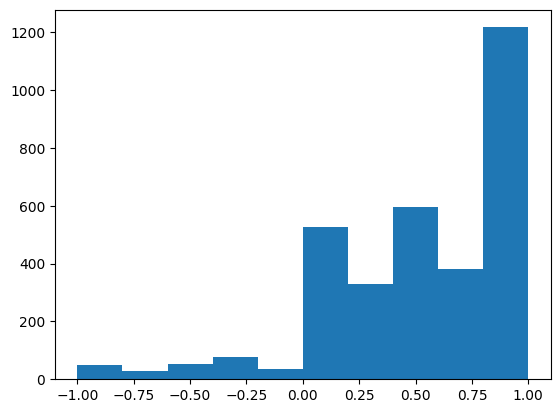

In [ ]:
plt.hist(citizen['e_pol_handling'])

Well, pol_handling went up after treatment, which shows that people feel more. More interestingly females saw a more dramatic increase, going from 0.35 to 0.54. But saftey perceptions dropped after treatment, so that is interesting and worth looking into more. Perhaps the treatments did help specifically with women's issues, but did not impact anything more, which is reflecting in these perceptions.

#### Visualizations

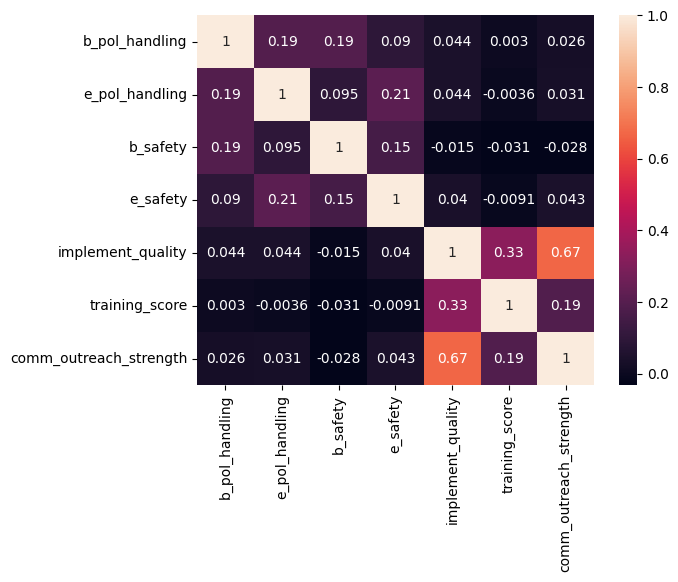

In [ ]:
#Lets see if any correlations exists
correlations = citizen[numeric].corr()
_ = sns.heatmap(correlations, annot=True)

Not much, but implement quality and community outreach, which is a good sign! This indicates some relationship between the community outreach and the quality of implementation. Lets look at a scatter plot to find out more

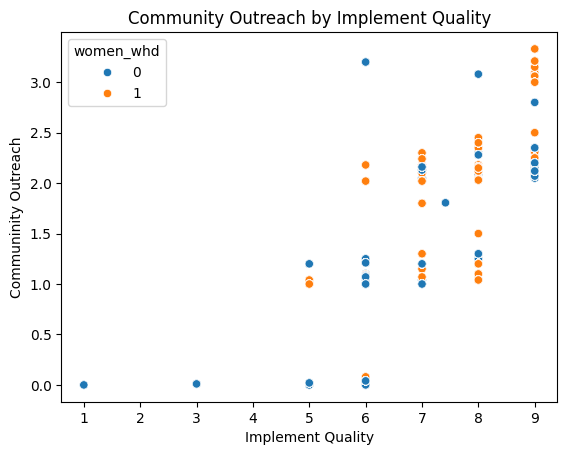

In [ ]:
_ = sns.scatterplot(data=citizen, x='implement_quality', y='comm_outreach_strength', hue='women_whd')
_ = plt.title('Community Outreach by Implement Quality')
_ = plt.xlabel('Implement Quality')
_ = plt.ylabel('Communinity Outreach')

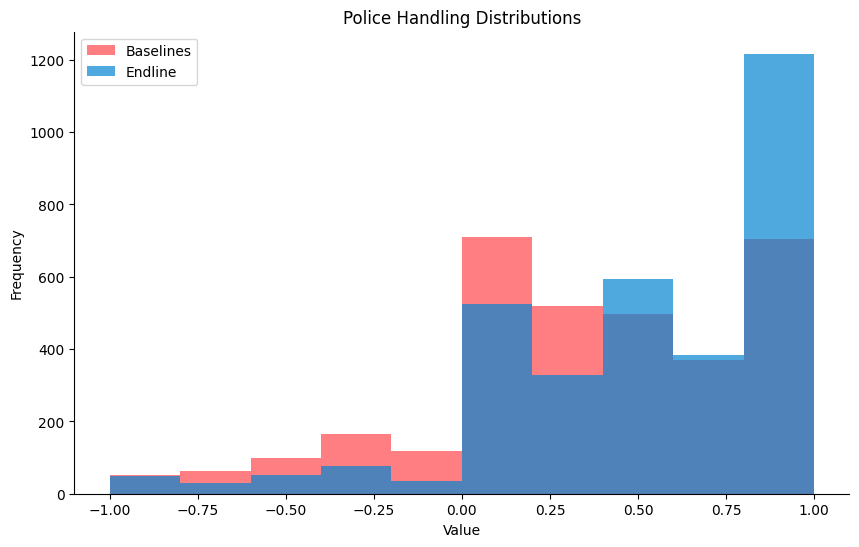

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
colors = ['xkcd:light red','xkcd:cerulean']
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(citizen['b_pol_handling'], alpha=0.7, color='xkcd:light red', label='Baselines')
plt.hist(citizen['e_pol_handling'], alpha=0.7, color='xkcd:cerulean', label='Endline')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Police Handling Distributions')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/hist_citizenPol.png', bbox_inches='tight', dpi=400)
plt.show()

There is a positive relationship between the implement quality and the community outreach. It also seems that women help desks help a bit more, even though those results are a bit mixed.

### User_Survey

#### Summary Statistics

Since our main data is ordinal, we will rely heavily on tables to see relationships.

In [ ]:
#Lets view the ordinal data
user = Q3_dic['User_Survery']
ordinal = ['visitsats',	'comfort', 'respect', 'resolution', 'fclitysats']
for o in ordinal:
  display(user[o].value_counts().reset_index())

,visitsats,count
0,Somewhat satisfied,1446
1,Very satisfied,1313
2,Somewhat dissatisfied,263
3,Very dissastisfied,156


,comfort,count
0,Very comfortable,1576
1,Somewhat comfortable,1314
2,Somewhat uncomfortable,218
3,Very uncomfortable,70


,respect,count
0,Very respectfully,1515
1,Somewhat respectfully,1452
2,Somewhat disrespectfully,153
3,Very disrespectfully,58


,resolution,count
0,Somewhat confident,1573
1,Very confident,1251
2,Somewhat unconfident,217
3,Very unconfident,137


,fclitysats,count
0,Somewhat satisfied,1764
1,Very satisfied,975
2,Somewhat dissatisfied,316
3,Very dissastisfied,123


People are vastly on the positive side, but also lean more into the 'Somewhat' than the 'Very'. I think it would have been interesting if there was 5 options, if people stayed with the positive side, but instead went right into the middle. The only category where a positive 'Very' is first is respect, but that is also the lowest difference from second place (63). On the overall visit, 133 more people were somewhat satisfied than very satisfied.

In [ ]:
ordinal = ['visitsats',	'comfort', 'respect', 'resolution', 'fclitysats']
for o in ordinal:
  values = user.groupby('treatment')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T) # get in percentage of whole for each group
  values['Difference'] = values['Treatment'] - values['Control']
  display(values.sort_values('Difference', ascending=False).reset_index().round(3))

treatment,visitsats,Control,Treatment,Difference
0,Very satisfied,0.390,0.424,0.034
1,Somewhat satisfied,0.455,0.455,-0.000
2,Very dissastisfied,0.058,0.045,-0.014
3,Somewhat dissatisfied,0.096,0.076,-0.020


treatment,comfort,Control,Treatment,Difference
0,Very comfortable,0.453,0.516,0.063
1,Very uncomfortable,0.022,0.022,-0.001
2,Somewhat comfortable,0.427,0.407,-0.020
3,Somewhat uncomfortable,0.097,0.055,-0.043


treatment,respect,Control,Treatment,Difference
0,Very respectfully,0.439,0.495,0.056
1,Very disrespectfully,0.019,0.018,-0.002
2,Somewhat disrespectfully,0.062,0.041,-0.021
3,Somewhat respectfully,0.480,0.446,-0.033


treatment,resolution,Control,Treatment,Difference
0,Very confident,0.385,0.398,0.013
1,Somewhat confident,0.489,0.498,0.008
2,Very unconfident,0.049,0.040,-0.008
3,Somewhat unconfident,0.077,0.064,-0.013


treatment,fclitysats,Control,Treatment,Difference
0,Very satisfied,0.250,0.334,0.085
1,Very dissastisfied,0.054,0.032,-0.022
2,Somewhat satisfied,0.575,0.546,-0.030
3,Somewhat dissatisfied,0.122,0.089,-0.033


  The positive very category changed the most for every cateogry. This indicates that the treatment may truly help people feel better about the police.

In [ ]:
for o in ordinal:
  values = user.groupby('women_whd')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T) # get in percentage of whole for each group
  values['Difference'] = values[1] - values[0]
  display(values.sort_values('Difference', ascending=False).reset_index())

women_whd,visitsats,0,1,Difference
0,Very satisfied,0.408478,0.421960,0.013482
1,Somewhat satisfied,0.455684,0.453721,-0.001963
2,Somewhat dissatisfied,0.084297,0.079855,-0.004442
3,Very dissastisfied,0.051541,0.044465,-0.007077


women_whd,comfort,0,1,Difference
0,Very comfortable,0.486031,0.514519,0.028488
1,Somewhat comfortable,0.407514,0.424682,0.017168
2,Very uncomfortable,0.025048,0.016334,-0.008714
3,Somewhat uncomfortable,0.081407,0.044465,-0.036942


women_whd,respect,0,1,Difference
0,Somewhat disrespectfully,0.044316,0.055354,0.011038
1,Very respectfully,0.473988,0.481851,0.007863
2,Very disrespectfully,0.019750,0.015426,-0.004323
3,Somewhat respectfully,0.461946,0.447368,-0.014578


women_whd,resolution,0,1,Difference
0,Somewhat unconfident,0.065511,0.073503,0.007992
1,Somewhat confident,0.493738,0.497278,0.003540
2,Very unconfident,0.041908,0.045372,0.003465
3,Very confident,0.398844,0.383848,-0.014996


women_whd,fclitysats,0,1,Difference
0,Very satisfied,0.291908,0.334846,0.042938
1,Somewhat dissatisfied,0.094412,0.108893,0.014481
2,Very dissastisfied,0.045761,0.025408,-0.020353
3,Somewhat satisfied,0.567919,0.530853,-0.037066


No real changes for women help desks either. Unfortunate.

In [ ]:
for o in ordinal:
  values = user.groupby('group')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T) # get in percentage of whole for each group
  values['Women Officer Difference'] = values['women officers'] - values['control']
  values['Regular Mhd Difference'] = values['regular mhd'] - values['control']
  display(values.sort_values('Regular Mhd Difference', ascending=False).reset_index())

group,visitsats,control,regular mhd,women officers,Women Officer Difference,Regular Mhd Difference
0,Very satisfied,0.389864,0.426667,0.421960,0.032097,0.036803
1,Somewhat satisfied,0.455166,0.456190,0.453721,-0.001445,0.001025
2,Very dissastisfied,0.058480,0.044762,0.044465,-0.014015,-0.013718
3,Somewhat dissatisfied,0.096491,0.072381,0.079855,-0.016636,-0.024110


group,comfort,control,regular mhd,women officers,Women Officer Difference,Regular Mhd Difference
0,Very comfortable,0.453216,0.518095,0.514519,0.061303,0.064879
1,Very uncomfortable,0.022417,0.027619,0.016334,-0.006083,0.005202
2,Somewhat uncomfortable,0.097466,0.065714,0.044465,-0.053001,-0.031752
3,Somewhat comfortable,0.426901,0.388571,0.424682,-0.002218,-0.038329


group,respect,control,regular mhd,women officers,Women Officer Difference,Regular Mhd Difference
0,Very respectfully,0.438596,0.508571,0.481851,0.043255,0.069975
1,Very disrespectfully,0.019493,0.020000,0.015426,-0.004067,0.000507
2,Somewhat respectfully,0.479532,0.444762,0.447368,-0.032164,-0.034770
3,Somewhat disrespectfully,0.062378,0.026667,0.055354,-0.007024,-0.035712


group,resolution,control,regular mhd,women officers,Women Officer Difference,Regular Mhd Difference
0,Very confident,0.384990,0.412381,0.383848,-0.001143,0.027391
1,Somewhat confident,0.489279,0.498095,0.497278,0.007999,0.008816
2,Very unconfident,0.048733,0.035238,0.045372,-0.003361,-0.013495
3,Somewhat unconfident,0.076998,0.054286,0.073503,-0.003495,-0.022712


group,fclitysats,control,regular mhd,women officers,Women Officer Difference,Regular Mhd Difference
0,Very satisfied,0.249513,0.333333,0.334846,0.085333,0.083821
1,Somewhat satisfied,0.575049,0.560952,0.530853,-0.044196,-0.014096
2,Very dissastisfied,0.053606,0.038095,0.025408,-0.028198,-0.015511
3,Somewhat dissatisfied,0.121832,0.067619,0.108893,-0.012939,-0.054213


Again main differences come for very positive! Seeing signifcant changes again indicates the group may have positive impacts on perceptions.

In [ ]:
for o in ordinal:
  values = user.groupby(['treatment', 'gender'])[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T) # get in percentage of whole for each group
  values['Female Difference'] = values['Treatment']['female'] - values['Control']['female']
  values['Male Difference'] = values['Treatment']['male'] - values['Control']['male']
  display(values.sort_values('Female Difference', ascending=False).reset_index())

treatment              visitsats   Control           Treatment            \
gender                              female      male    female      male   
0                 Very satisfied  0.372014  0.413636  0.404742  0.449946   
1             Somewhat satisfied  0.467577  0.438636  0.470155  0.434876   
2             Very dissastisfied  0.042662  0.079545  0.044154  0.045210   
3          Somewhat dissatisfied  0.117747  0.068182  0.080948  0.069968   

treatment Female Difference Male Difference  
gender                                       
0                  0.032729        0.036310  
1                  0.002579       -0.003760  
2                  0.001492       -0.034336  
3                 -0.036799        0.001786

treatment                 comfort   Control           Treatment            \
gender                               female      male    female      male   
0                Very comfortable  0.423208  0.493182  0.491415  0.548977   
1              Very uncomfortable  0.022184  0.022727  0.018806  0.025834   
2            Somewhat comfortable  0.438567  0.411364  0.430090  0.376749   
3          Somewhat uncomfortable  0.116041  0.072727  0.059689  0.048439   

treatment Female Difference Male Difference  
gender                                       
0                  0.068206        0.055796  
1                 -0.003378        0.003107  
2                 -0.008477       -0.034614  
3                 -0.056352       -0.024288

treatment                   respect   Control           Treatment            \
gender                                 female      male    female      male   
0                 Very respectfully  0.452218  0.420455  0.506950  0.479010   
1              Very disrespectfully  0.017065  0.022727  0.013900  0.022605   
2             Somewhat respectfully  0.457338  0.509091  0.439902  0.454252   
3          Somewhat disrespectfully  0.073379  0.047727  0.039248  0.044133   

treatment Female Difference Male Difference  
gender                                       
0                  0.054732        0.058555  
1                 -0.003165       -0.000122  
2                 -0.017436       -0.054839  
3                 -0.034131       -0.003594

treatment            resolution   Control           Treatment            \
gender                             female      male    female      male   
0                Very confident  0.365188  0.411364  0.379395  0.421959   
1            Somewhat confident  0.510239  0.461364  0.516762  0.472551   
2              Very unconfident  0.039249  0.061364  0.035977  0.046286   
3          Somewhat unconfident  0.085324  0.065909  0.067866  0.059203   

treatment Female Difference Male Difference  
gender                                       
0                  0.014207        0.010595  
1                  0.006523        0.011187  
2                 -0.003272       -0.015077  
3                 -0.017458       -0.006706

treatment             fclitysats   Control           Treatment            \
gender                              female      male    female      male   
0                 Very satisfied  0.252560  0.245455  0.340965  0.325081   
1             Very dissastisfied  0.029010  0.086364  0.028618  0.035522   
2             Somewhat satisfied  0.578498  0.570455  0.539657  0.553283   
3          Somewhat dissatisfied  0.139932  0.097727  0.090760  0.086114   

treatment Female Difference Male Difference  
gender                                       
0                  0.088405        0.079626  
1                 -0.000392       -0.050842  
2                 -0.038842       -0.017171  
3                 -0.049171       -0.011613

Same applies for female and male differences between control and treatment groups. No truly new insights here from the control vs. treatment from before. Good data to have though.

#### Visualizations

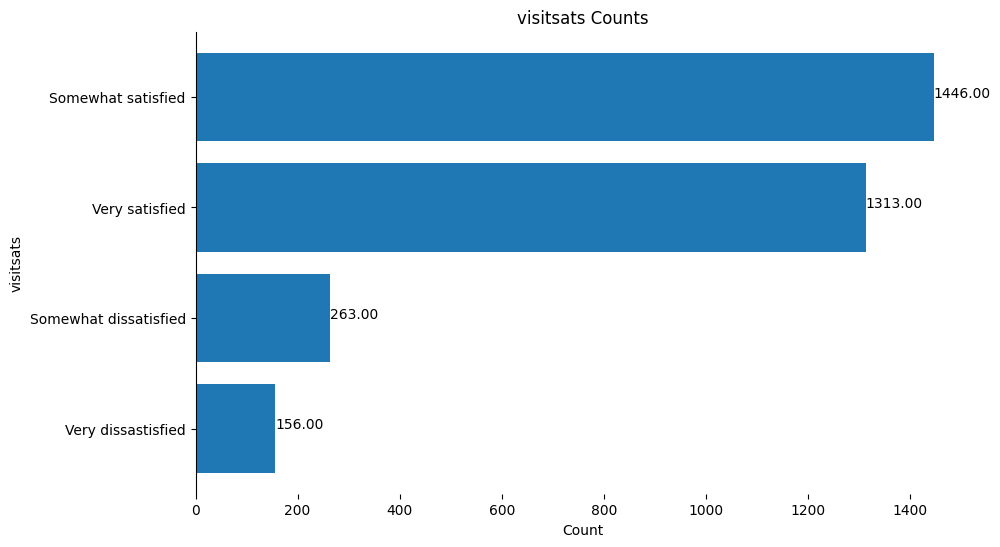

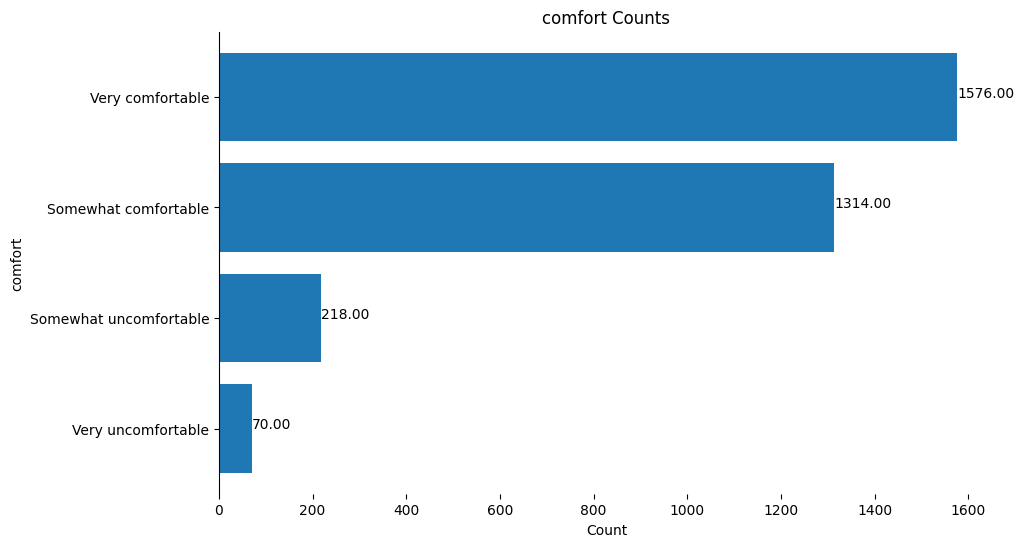

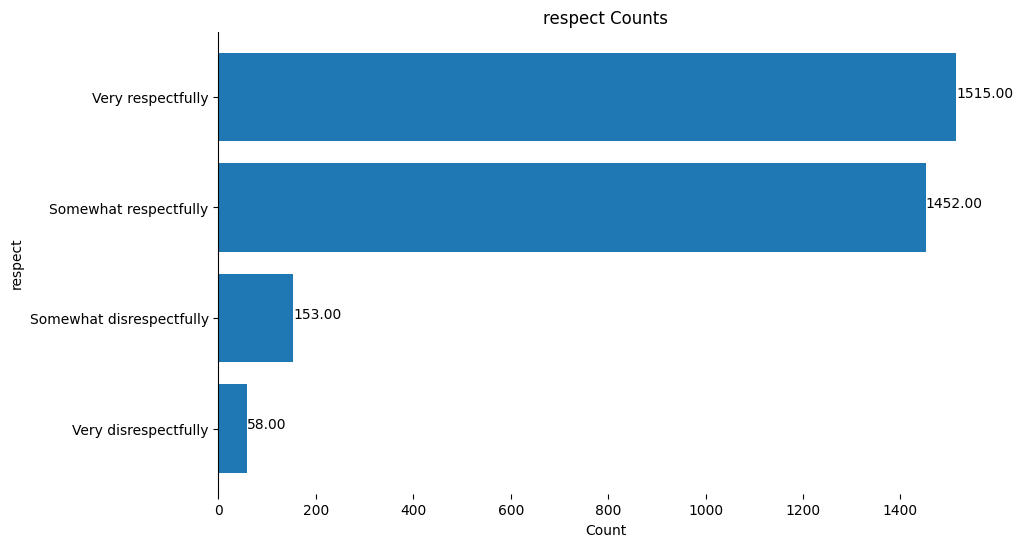

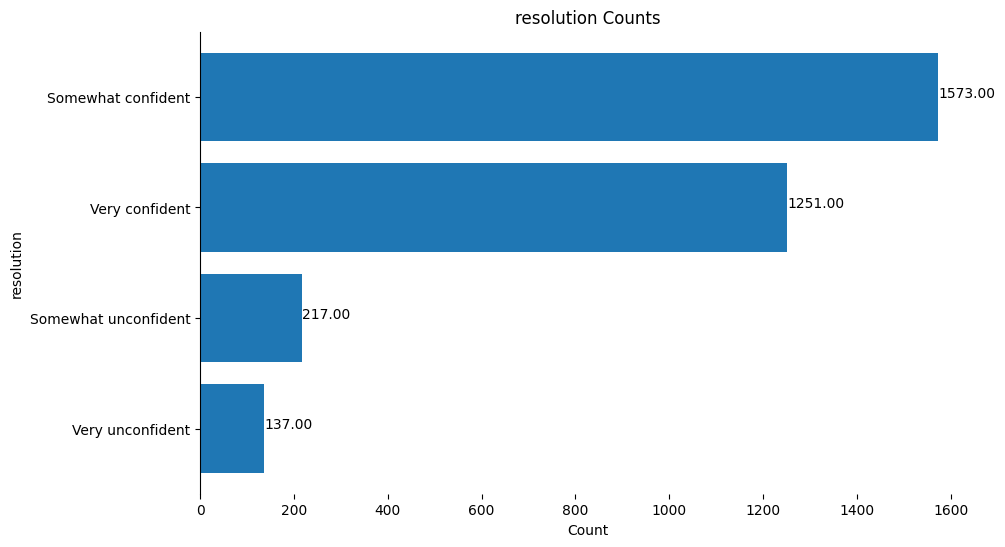

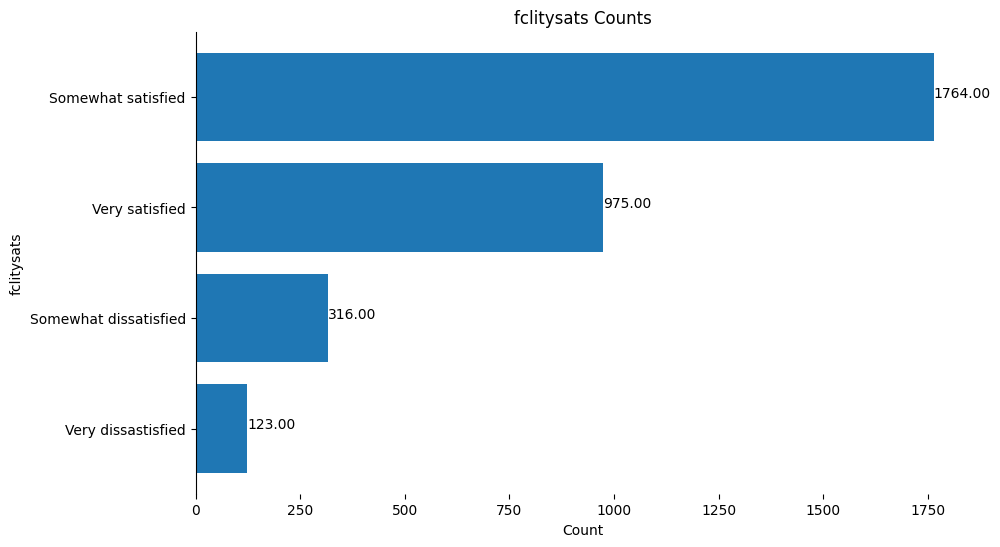

In [ ]:
for o in ordinal:
  plt.figure(figsize=(10, 6))
  temp = user[o].value_counts().reset_index().sort_values('count')
  plt.barh(temp[o], temp['count'])

  for index, value in enumerate(temp['count']):
      plt.text(value, index, '{:.2f}'.format(value))

  plt.ylabel(o)
  plt.xlabel('Count')
  plt.title(f'{o} Counts')
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().spines['bottom'].set_visible(False)
  plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/bar_{o}EDA.png', bbox_inches='tight', dpi=400)
  plt.show()

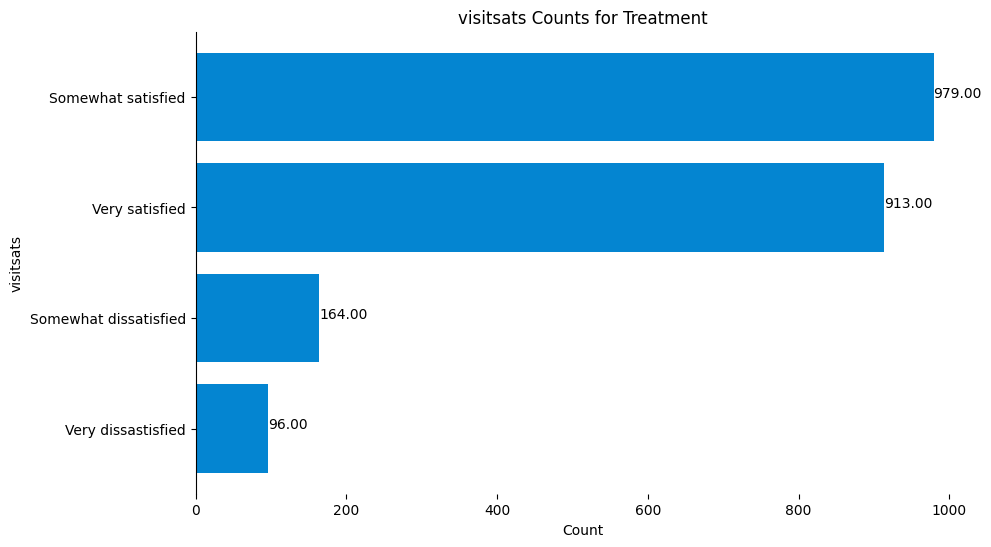

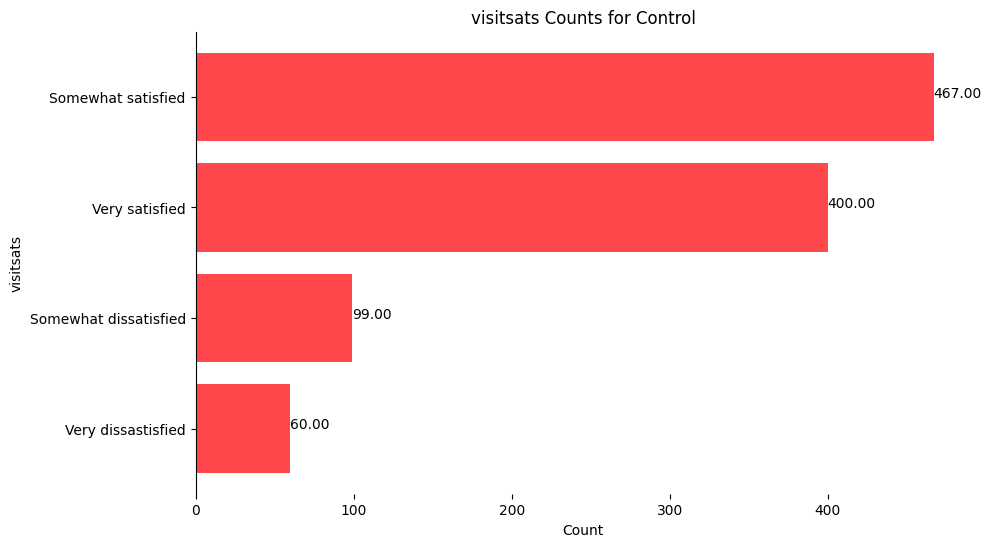

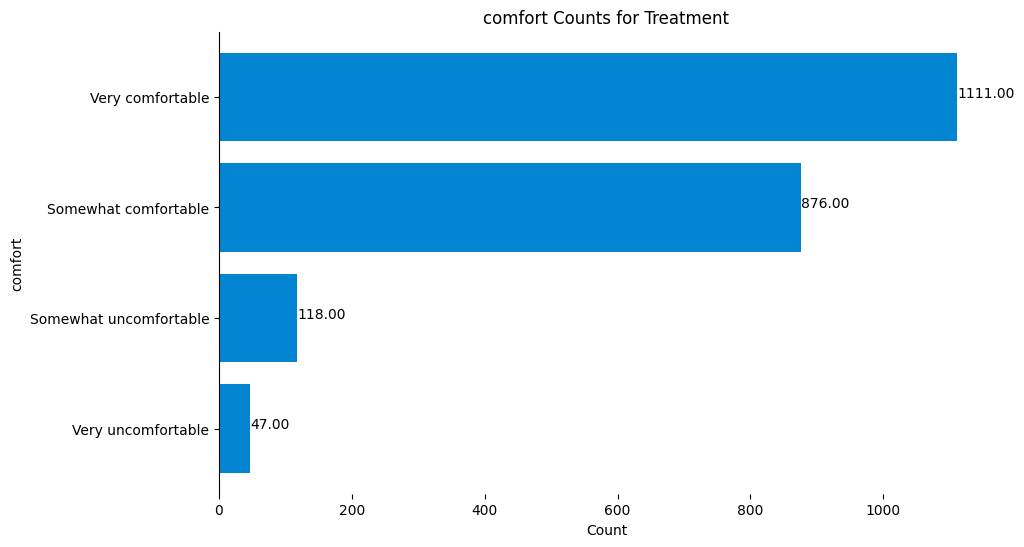

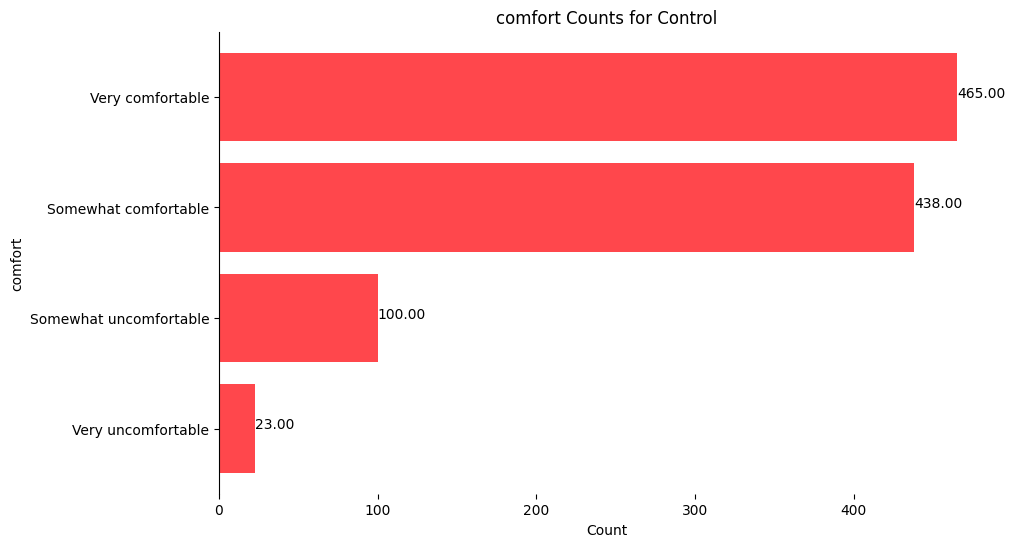

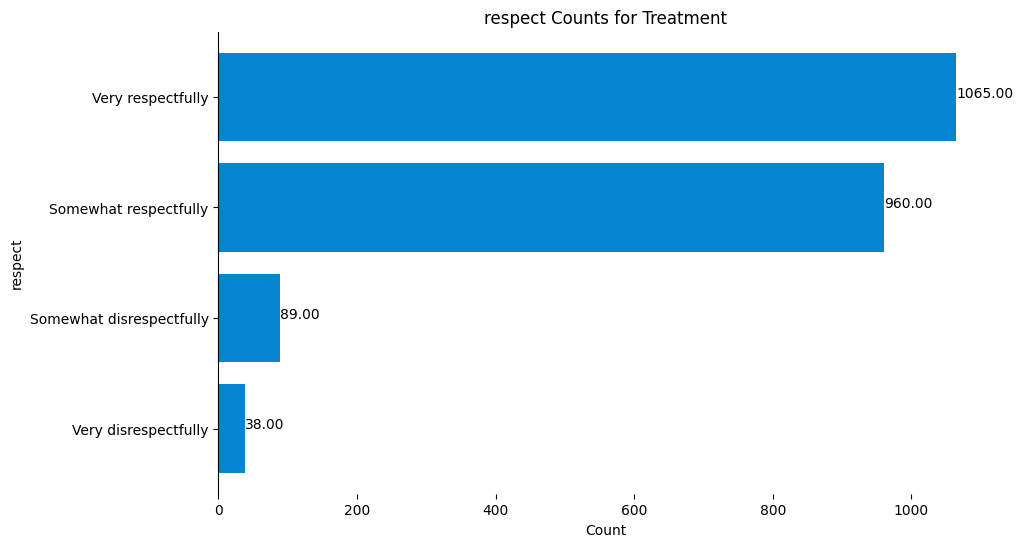

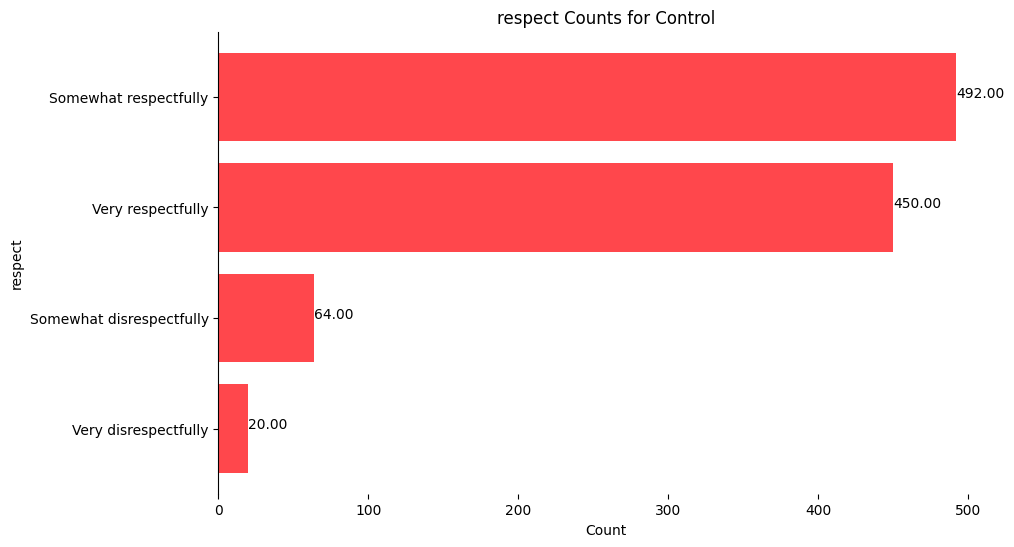

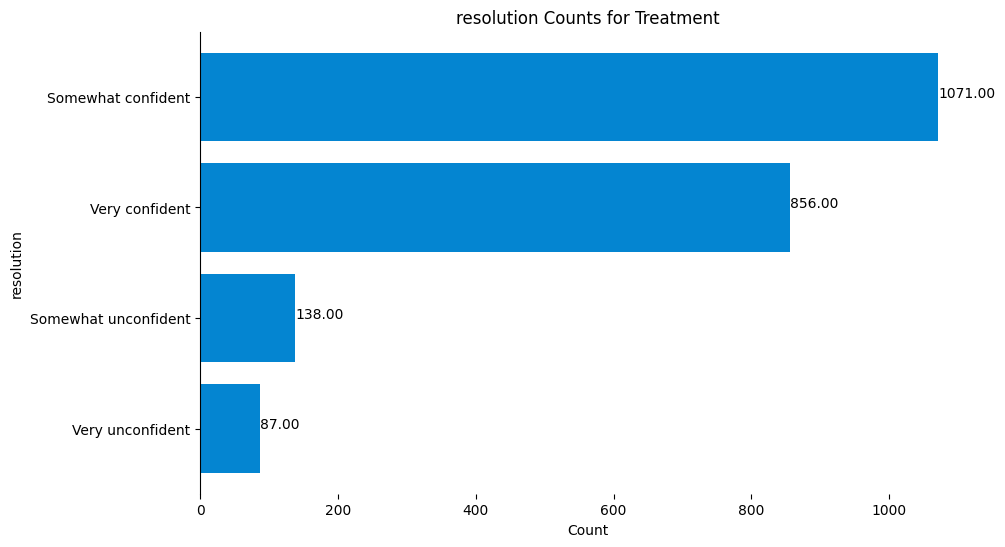

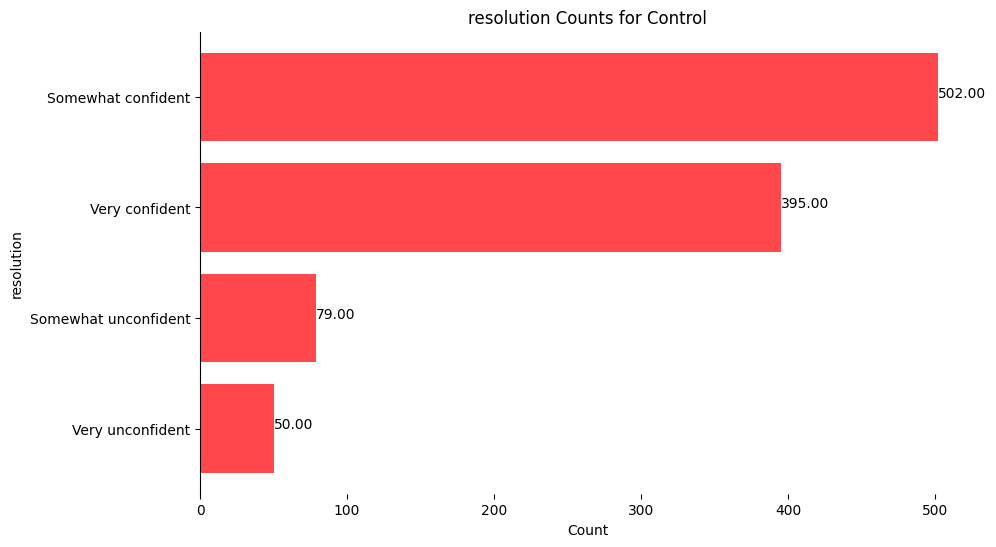

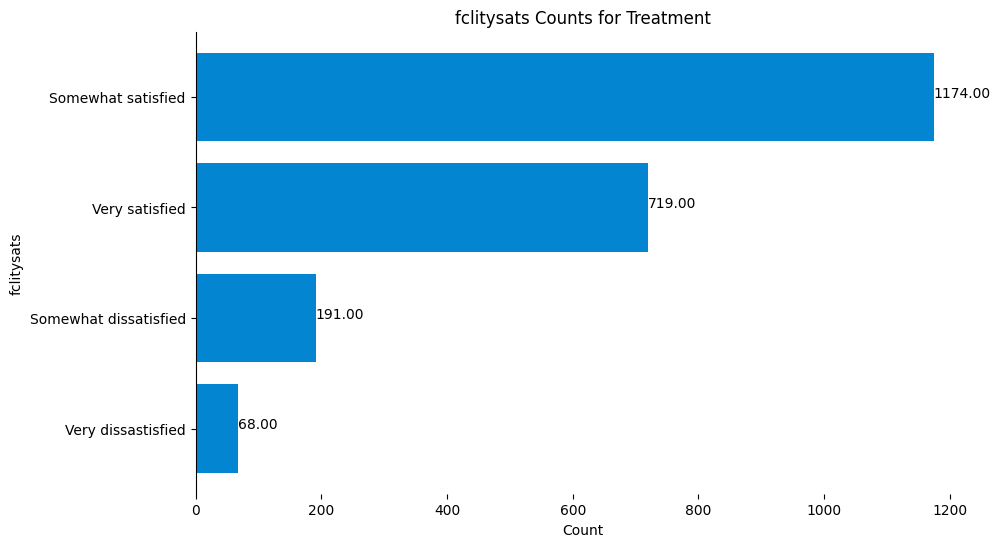

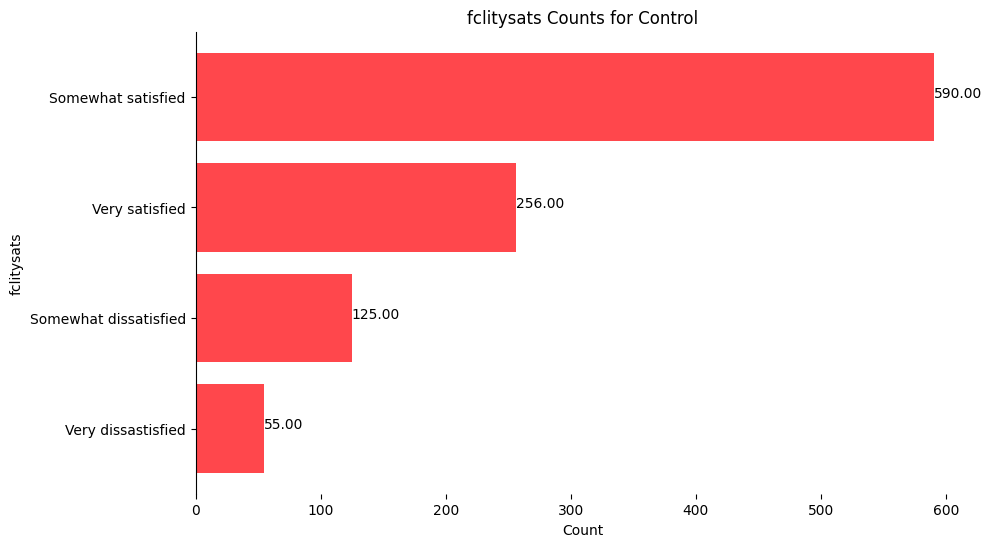

In [ ]:
# Loop through each ordinal variable
for o in ordinal:
    # Loop through each treatment to create separate plots
    for treatment in user['treatment'].unique():
        plt.figure(figsize=(10, 6))

        # Filter the data for the specific treatment
        temp = user[user['treatment'] == treatment][o].value_counts().reset_index()
        temp.columns = [o, 'count']
        temp = temp.sort_values('count')

        # Plot the bar chart
        plt.barh(temp[o], temp['count'], color=colors[1 if treatment == 'Treatment' else 0])

        # Add value labels
        for index, value in enumerate(temp['count']):
            plt.text(value, index, '{:.2f}'.format(value))

        plt.ylabel(o)
        plt.xlabel('Count')
        plt.title(f'{o} Counts for {treatment}')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)

        # Show the plot for the specific treatment
        plt.show()

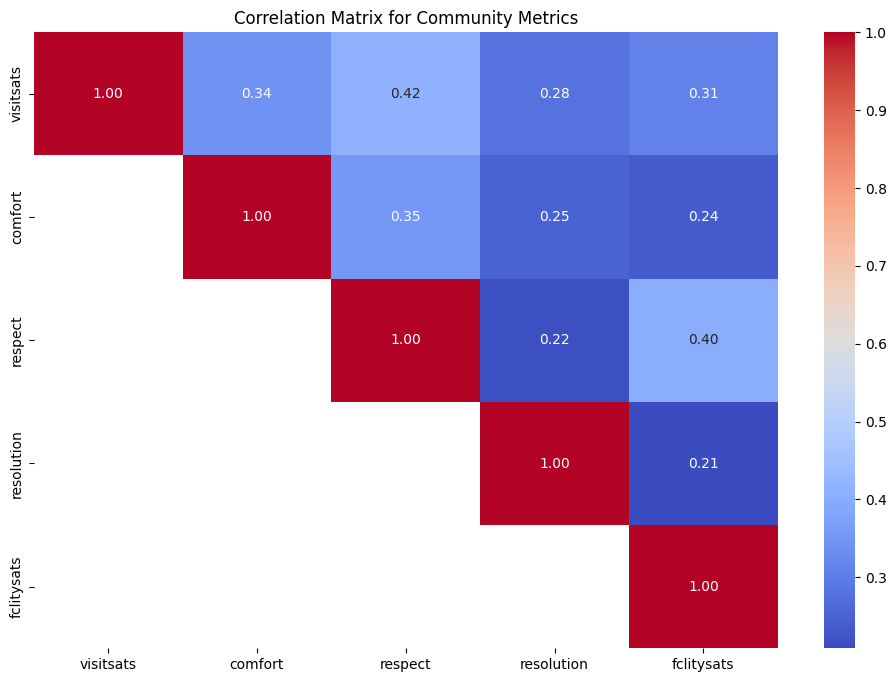

In [ ]:
from sklearn.preprocessing import LabelEncoder
numeric_data = user.select_dtypes(include='number')

# Identify categorical columns
categorical_columns = user.select_dtypes(include='object').columns

# Encode categorical columns using LabelEncoder
encoded_data = user.copy()
for col in categorical_columns:
    if user[col].nunique() > 1:  # Skip columns with only one unique value
        encoder = LabelEncoder()
        encoded_data[col] = encoder.fit_transform(user[col].astype(str))

# Combine encoded categorical and numeric data
combined_data = encoded_data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = combined_data[['visitsats', 'comfort', 'respect', 'resolution', 'fclitysats']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask = ~mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Community Metrics')
plt.savefig('/content/drive/MyDrive/Data - Human Centered DS/Plots/cfmatriclogisticq3.png', bbox_inches='tight', dpi=400)
plt.show()

These graphics should be quite helpfuly to show perceptions! The tabels are greta but can get messy, these can at least show some of the basic concepts in them. The second graphic may eventually become a stacked bar, but this is clearer for me at the moment. Again, these are mostly to illustrate findings from the tables.

## Question 4
**Main Question:**
* How much does the number of female officers/presence of a female helpdesk affect the number of women that enter the station?

**Subquestions:**
* Will more women enter the station if they know there are women there to help them?
* Does this have an effect on the number of reports filed (FIR and DIR)?
* Does urban versus rural areas make a difference in this regard?


In [ ]:
for key, value in Q4_dic.items():
  print(key)
  try:
    display(value.head())
    value.info()
  except:
    display(value)

folder


'Question_4'

Admin


,month,fir_overall_count,fir_caw_count,fir_bywomen_count,arrest_count,dir_count,ncr_count,dial100_count,ps_code,population,...,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,2019-06-01,35,8,5,20,0,100,40.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
1,2019-11-01,29,10,4,10,1,0,35.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
2,2018-10-01,26,8,3,12,0,72,25.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
3,2018-11-01,27,8,4,12,0,64,41.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
4,2020-05-01,32,6,4,10,0,22,55.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   4500 non-null   object 
 1   fir_overall_count       4500 non-null   int64  
 2   fir_caw_count           4500 non-null   int64  
 3   fir_bywomen_count       4500 non-null   int64  
 4   arrest_count            4500 non-null   int64  
 5   dir_count               4500 non-null   int64  
 6   ncr_count               4500 non-null   int64  
 7   dial100_count           4500 non-null   float64
 8   ps_code                 4500 non-null   float64
 9   population              4500 non-null   int64  
 10  urban                   4500 non-null   object 
 11  dist_urban              4500 non-null   int64  
 12  strat_pca               4500 non-null   float64
 13  treatment               4500 non-null   object 
 14  group                   4500 non-null   

,Unnamed: 0,ps_code,urban,dist_urban,strat_pca,treatment,group,dist_id,training_score,regular_whd,...,b_total_surveyed,b_female_surveyed,b_male_surveyed,population,implement_quality,comm_outreach_strength,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,0,1001.0,Rural,1,-0.234041,Treatment,women officers,1000,2.916667,0,...,10,0,10,129345,9,2.200000,3.818182,3.272727,6.000000,3.000000
1,1,1002.0,Rural,1,-0.960574,Control,control,1000,1.545454,0,...,11,0,11,170000,7,1.798067,2.454546,1.727273,0.000000,1.000000
2,2,1003.0,Rural,1,1.042663,Control,control,1000,1.090909,0,...,11,2,9,102467,7,1.798067,7.300000,4.900000,3.000000,3.500000
3,3,1004.0,Rural,1,-1.590761,Treatment,regular mhd,1000,3.897297,1,...,13,3,10,54000,7,2.030000,3.000000,1.800000,1.000000,1.333333
4,4,1005.0,Rural,1,-1.570695,Treatment,women officers,1000,4.157658,0,...,12,2,10,76376,9,2.200000,2.777778,2.500000,2.333333,1.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3416 non-null   int64  
 1   ps_code                 3416 non-null   float64
 2   urban                   3416 non-null   object 
 3   dist_urban              3416 non-null   int64  
 4   strat_pca               3416 non-null   float64
 5   treatment               3416 non-null   object 
 6   group                   3416 non-null   object 
 7   dist_id                 3416 non-null   int64  
 8   training_score          3416 non-null   float64
 9   regular_whd             3416 non-null   int64  
 10  women_whd               3416 non-null   int64  
 11  dayofweek               3416 non-null   object 
 12  timeofday               3416 non-null   object 
 13  eavg_all                3416 non-null   float64
 14  eavg_women              3416 non-null   

,rand_index,total_assigned_officers,total_fir_2017,population,urban,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,0,47,412,129345,Rural,1,-0.234041,Treatment,women officers,1000,9.000000,2.916667,2.200000,0,1
1,1,29,218,170000,Rural,1,-0.960574,Control,control,1000,7.462185,1.545454,1.798067,0,0
2,2,75,694,102467,Rural,1,1.042663,Control,control,1000,7.462185,1.090909,1.798067,0,0
3,3,40,144,54000,Rural,1,-1.590761,Treatment,regular mhd,1000,7.000000,3.897297,2.030000,1,0
4,4,37,130,76376,Rural,1,-1.570695,Treatment,women officers,1000,9.000000,4.157658,2.200000,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rand_index               180 non-null    int64  
 1   total_assigned_officers  180 non-null    int64  
 2   total_fir_2017           180 non-null    int64  
 3   population               180 non-null    int64  
 4   urban                    180 non-null    object 
 5   dist_urban               180 non-null    int64  
 6   strat_pca                180 non-null    float64
 7   treatment                180 non-null    object 
 8   group                    180 non-null    object 
 9   dist_id                  180 non-null    int64  
 10  implement_quality        180 non-null    float64
 11  training_score           180 non-null    float64
 12  comm_outreach_strength   180 non-null    float64
 13  regular_whd              180 non-null    int64  
 14  women_whd                1

### CCTV

#### Summary Stats

In [ ]:
#Lets condense our columns
mostRelavent = ['bavg_women', 'eavg_women', 'bavg_all', 'eavg_all', 'bavg_wprop', 'eavg_wprop']
CCTV = Q4_dic['CCTVwFemaleStaff']

In [ ]:
(CCTV.groupby('timeofday')[mostRelavent].agg(['mean', 'std', 'min', 'max']).T.round(2))

timeofday        afternoon  evening  morning
bavg_women mean      13.89    12.90    13.10
           std       13.86    13.24    12.58
           min        0.00     0.00     0.00
           max      110.32   110.67    92.57
eavg_women mean      15.86    14.15    14.05
           std       15.72    12.71    12.81
           min        0.00     0.00     0.00
           max      143.71   112.49   114.47
bavg_all   mean     140.91   138.40   156.05
           std       82.05    82.68    90.68
           min        0.50     0.00     0.00
           max      841.12   562.80   803.39
eavg_all   mean     149.34   128.69   156.89
           std       85.18    75.08    79.46
           min        0.00     0.00     0.00
           max      795.16   661.07   713.71
bavg_wprop mean       0.09     0.10     0.08
           std        0.06     0.08     0.06
           min        0.00     0.00     0.00
           max        0.48     0.56     0.47
eavg_wprop mean       0.10     0.11     0.09
           std        0.07     0.10     0.06
           min        0.00     0.00     0.00
           max        0.58     0.79     0.56

In [ ]:
CCTV.groupby('dayofweek')[mostRelavent].agg(['mean', 'std']).T.round(2)

dayofweek           Fri     Mon     Sat     Sun     Thu     Tue     Wed
bavg_women mean   13.59   13.54   13.58   12.24   12.61   13.74   13.75
           std    13.67   13.67   13.75   12.14   12.62   13.64   13.07
eavg_women mean   14.96   16.14   14.08   14.12   14.16   14.06   15.31
           std    13.64   15.02   13.39   15.55   12.66   11.59   14.61
bavg_all   mean  150.06  147.81  146.04  142.12  139.01  140.53  150.46
           std    90.51   92.97   88.91   91.06   75.23   77.48   81.00
eavg_all   mean  143.10  154.77  141.82  137.91  144.92  143.81  149.01
           std    77.98   84.25   77.18   86.78   78.29   76.24   84.33
bavg_wprop mean    0.09    0.09    0.09    0.08    0.09    0.09    0.09
           std     0.07    0.07    0.07    0.07    0.07    0.07    0.07
eavg_wprop mean    0.10    0.10    0.10    0.10    0.09    0.10    0.10
           std     0.07    0.07    0.08    0.09    0.07    0.08    0.07

Wow! It can be seen that between bavg_women and eavg_women, eavg_women is always higher for day of week and time of day on average. That seems to indicate that the treatments do actually make people more apt to go into the station!

In [ ]:
CCTV[['b_female_staff', 'e_female_staff']].agg(['mean']).T.round(2)

,mean
b_female_staff,3.15
e_female_staff,5.22


#### Visualizations

<Axes: xlabel='b_female_officers', ylabel='bavg_women'>

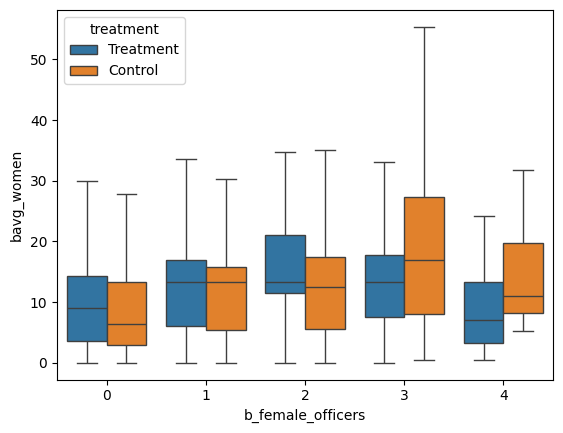

In [ ]:
sns.boxplot(data = CCTV, y='bavg_women', x='b_female_officers', hue= 'treatment', showfliers=False)

<Axes: xlabel='e_female_officers', ylabel='eavg_women'>

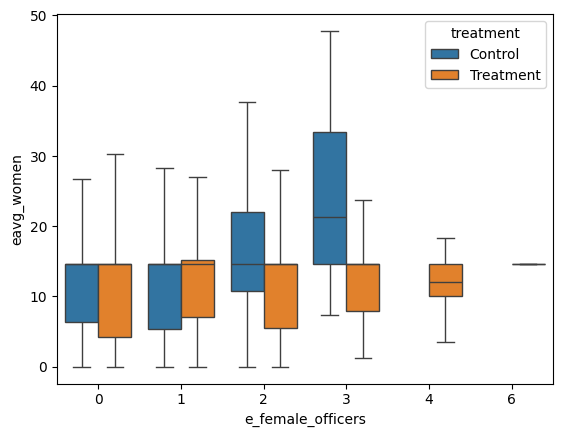

In [ ]:
sns.boxplot(data = CCTV, y='eavg_women', x='e_female_officers', hue = 'treatment', showfliers=False)

These unfortunately do not dictate that there is a strong relationship between female officers and the number of women entering the stations. It actually seems that after baseline, the number of female officers sometimes relates to less women coming into the station.  

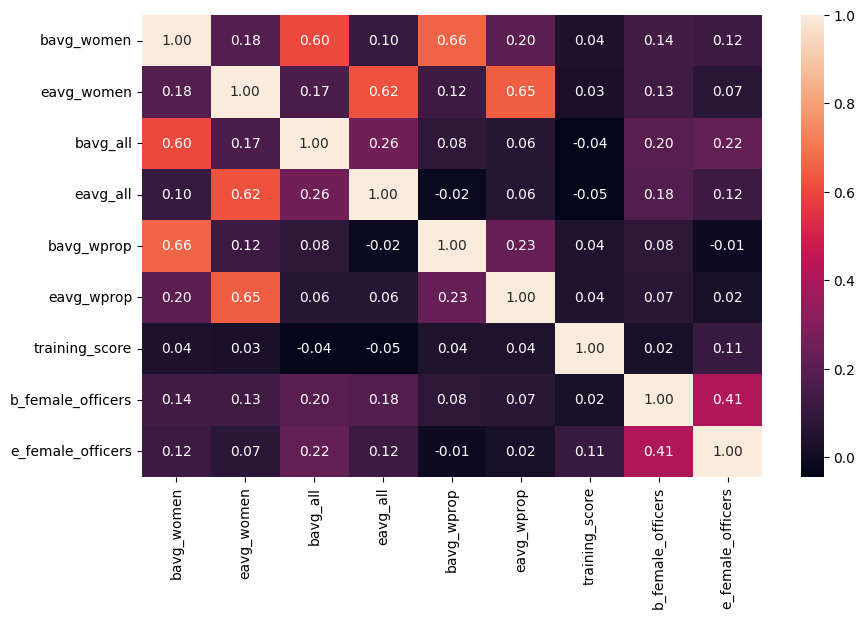

In [ ]:
#Lets see if any correlations exists
corrCols = mostRelavent + ['training_score', 'b_female_officers', 'e_female_officers']
plt.figure(figsize=(10, 6))
correlations = CCTV[corrCols].corr()
_ = sns.heatmap(correlations, annot=True, fmt='.2f')

No strong correlations exist between the training score and the female officer. This indicates that they may not influence people coming into the station.

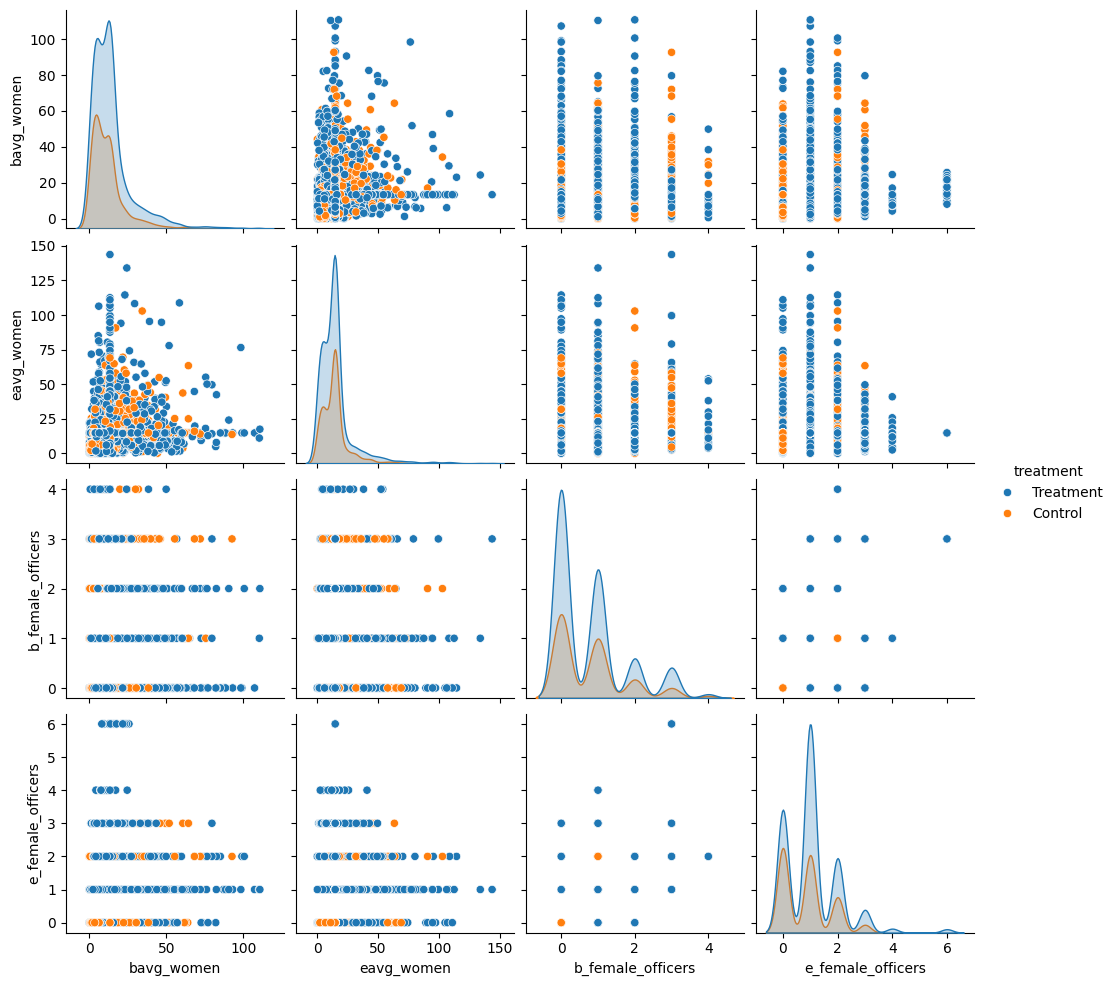

In [ ]:
pairPlt = ['bavg_women', 'eavg_women', 'b_female_officers', 'e_female_officers']
pairPlt = pairPlt + ['treatment']
pairplot_figure = sns.pairplot(data=CCTV[pairPlt], hue='treatment')
_ = plt.show()

A LOT to look at here! Most plots seem positive, but really show more the. One super cool thing to note is that treatment groups seem to score on average, more than the control. (So the treatments are working)! The scatter plots pretty much show that the relationships between these variables is just not there or uninteresting. Some look positive, but I would be surprised if the total average and women average did not have a positive relationship. The histograms are much more interesting.

### Random

#### Summary Stats

In [ ]:
random = Q4_dic['Random']

In [ ]:
firs = random.groupby('dist_id')[['total_fir_2017', 'population']].agg(['mean', 'std', 'min', 'max']).reset_index()
firs['Mean Per Population'] = firs['total_fir_2017']['mean'] / firs['population']['mean']
firs

dist_id total_fir_2017                            population  \
                     mean         std  min   max           mean   
0     1000     297.400000  202.776944   52   694  123187.900000   
1     2000     221.833333  120.900284   86   455  102915.333333   
2     3000     474.120000  197.155675  131   798  134259.160000   
3     4000     453.680000  241.126129   45   807   74618.680000   
4     5000     446.280000  183.395865  133   771  207628.320000   
5     6000     384.520000  174.523666  159   847  169711.280000   
6     7000     475.200000  236.723843  205  1009  115459.600000   
7     8000     206.625000   51.300063  165   316   97417.500000   
8     9000     355.600000  128.251662  201   574  118783.300000   
9    10000     262.900000  106.583770   79   383  113985.800000   
10   11000     278.900000  146.447146  106   605  101983.000000   
11   12000     339.100000  246.455518  105   910  100936.000000   

                                 Mean Per Population  
              std    min     max                      
0    70148.043685  54000  277108            0.002414  
1    38260.904913  29748  150066            0.002155  
2    87553.706784  35000  400000            0.003531  
3    41667.173991  28000  150000            0.006080  
4   134100.034408  66000  545000            0.002149  
5    88574.244918  46567  465000            0.002266  
6    37882.707002  52948  166648            0.004116  
7    32243.393458  49903  153040            0.002121  
8    74090.561275  52000  250000            0.002994  
9    55565.273006  28452  210000            0.002306  
10   30225.230704  44669  142662            0.002735  
11   44637.804807  23565  165000            0.003360

An intersting one here. You can see that the numbers of firs written in 2017 accounts for less than 0.5% of the population. Seeing that "an estimated 4 in 10 Indian women report experiencing domestic violence in their lifetimes," that is pretty scary. A small portion actually report these crimes, but that is a problem with police perceptions!

#### Visualizations

<Axes: xlabel='dist_id', ylabel='total_fir_2017'>

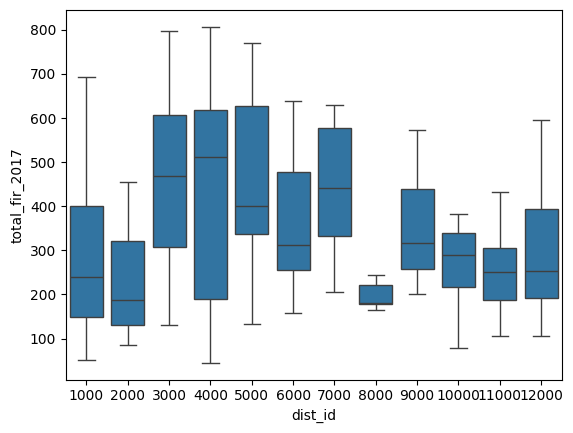

In [ ]:
display(sns.boxplot(data = random, y='total_fir_2017', x='dist_id', showfliers=False))

<Axes: xlabel='dist_id', ylabel='population'>

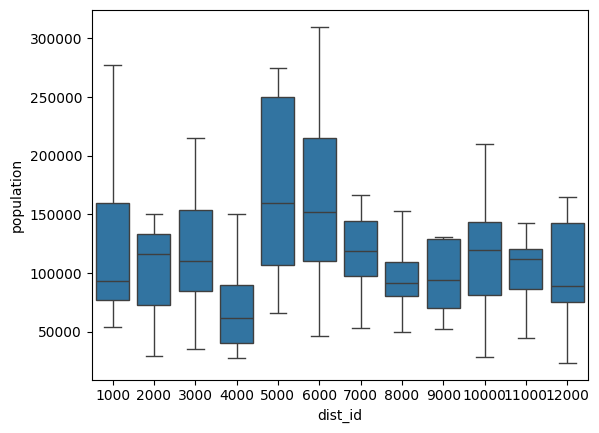

In [ ]:
display(sns.boxplot(data = random, y='population', x='dist_id', showfliers=False))

This visualizes the table! As you can see district 4000 has more firs based on population than others. The rest seem around the proportion.

### Admin

In [ ]:
admin = Q4_dic['Admin']
table = admin.groupby('group')[['dir_count']].agg(['mean', 'std', 'min', 'max']).T.round(2)
table

group           control  regular mhd  women officers
dir_count mean     0.02         0.79            0.71
          std      0.35         2.75            2.27
          min      0.00         0.00            0.00
          max      8.00        33.00           32.00

Number of firs on average do not change based on women officers and things like that. Unfortunate. BUT, dir count sees a significant uptick, indicating that the presence of women gets more things filed.

In [ ]:
admin = Q4_dic['Admin']
table = admin.groupby('group')[['fir_overall_count']].agg(['mean', 'std', 'min', 'max']).T.round(2)
table

group                   control  regular mhd  women officers
fir_overall_count mean    33.59        33.36           33.03
                  std     24.34        23.60           21.28
                  min      0.00         2.00            0.00
                  max    271.00       419.00          235.00